# i. Perkenalan

=======================================================

Graded Challenge 5

Nama : Jeni Kasturi

Batch : FTDS_BSD_2

Memprediksi default_payment_next_month apakah pelanggan membayar atau tidak dari database [credit_card_default]('https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=kisikisilc1&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default')

=======================================================

- **Latar Belakang :**

    Dalam era modern ini, penggunaan kartu kredit telah menjadi hal yang umum dalam kehidupan sehari-hari. Kartu kredit memfasilitasi transaksi keuangan dengan mudah dan memberikan fleksibilitas bagi pemegang kartu untuk melakukan pembayaran dalam waktu yang lebih panjang. Sebagai akibat dari kenyamanan ini, ada resiko besar yang menyertainya. Salah satu resiko terbesar yang dihadapi oleh perusahaan penerbit kartu kredit dan penyedia layanan terkait adalah ketidakmampuan klien untuk membayar cicilan kartu kredit mereka. Fenomena ini dikenal sebagai "default" atau "kredit macet." Ketika klien gagal membayar cicilan mereka, ini dapat memiliki dampak serius pada perusahaan yang terlibat, termasuk bank dan penyedia kartu kredit.

- **Problem Statement :**

    Ketidakmampuan klien untuk membayar cicilan kartu kredit mereka adalah masalah serius dalam industri kartu kredit saat ini. Dalam situasi seperti ini, perusahaan harus menghadapi konsekuensi berupa kerugian finansial yang signifikan. Oleh karena itu, diperlukan langkah-langkah untuk memastikan apakah klien akan melakukan pembayaran di bulan berikutnya atau tidak. Ini merupakan tantangan besar dalam mengelola risiko dalam bisnis kartu kredit. 

- **Objective :**

    Project ini bertujuan untuk mengetahui faktor-faktor apa saja yang mempengaruhi pelanggan dalam menggunakan pinjaman pada kartu kredit apakah klien akan membayar tepat waktu atau tidak, serta mendapatkan hasil prediksi dengan menggunakan *Logistic Regression*, *Support Vector Machine* (`SVM`), dan *K-Nearest Neighbors* (`KNN`) untuk memprediksi default_payment_next_month sesuai dengan yang diharapkan dengan hasil Goodfit pada akhir test.

---

# ii. Query SQL

Pada bagian ini kita telah melakukan query SQL pada database [credit_card_default]('https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=kisikisilc1&ws=!1m10!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m4!1m3!1skisikisilc1!2sbquxjob_40b72fec_18b69bf1c4c!3sUS'), lalu kita pilih hanya kolom :
- `limit_balance`
- `sex`
- `education_level`
- `marital_status`
- `age`
- `pay_0`
- `pay_2`
- `pay_3`
- `pay_4`
- `pay_5`
- `pay_6`
- `bill_amt_1`
- `bill_amt_2`
- `bill_amt_3`
- `bill_amt_4`
- `bill_amt_5`
- `bill_amt_6`
- `pay_amt_1`
- `pay_amt_2`
- `pay_amt_3`
- `pay_amt_4`
- `pay_amt_5`
- `pay_amt_6`
- `default_payment_next_month`

Dengan mengganti tipe data beberapa kolom seperti ketentuan dibawah ini :

| Kolom | Tipe Data Awal | Tipe Data Akhir |
|----------- | --------- | --------- |
|sex| STRING | INT |
|education_level| STRING | INT |
|marital_status	| STRING | INT |
|pay_5| STRING | FLOAT |
|pay_6| STRING | FLOAT |
|default_payment_next_month	| STRING | INT |

Dengan format SQL seperti dibawah ini :

``` sql
SELECT 
  limit_balance, 
  CAST(sex AS INT64)AS sex, 
  CAST(education_level AS INT64)AS education_level, 
  CAST(marital_status AS INT64)AS marital_status, 
  age, 
  pay_0, 
  pay_2, 
  pay_3, 
  pay_4, 
  CAST(pay_5 AS FLOAT64)AS pay_5, 
  CAST(pay_6 AS FLOAT64)AS pay_6, 
  bill_amt_1, 
  bill_amt_2, 
  bill_amt_3, 
  bill_amt_4, 
  bill_amt_5, 
  bill_amt_6, 
  pay_amt_1, 
  pay_amt_2, 
  pay_amt_3, 
  pay_amt_4, 
  pay_amt_5, 
  pay_amt_6, 
  CAST(default_payment_next_month AS INT64)AS default_payment_next_month 
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 4004;


Setelah mengquery SQL, langkah selanjutnya kita bisa menggunakan database kita untuk kita olah di tahap selanjutnya.

---

# iii. Model Inference

### 1. Import Libraries

Import semua library yang dibutuhkan dalam projek.

In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pickle
import json
from feature_engine.outliers import Winsorizer  # Capping normal dan skewed distribution
from sklearn.preprocessing import MinMaxScaler  # scalling
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler

# import FE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

# Check Performance Model against Train-Set
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

---

# iv. Data Loading

Pada bagian data loading ini kita akan memuat dan menampilkan dataset ... yang kita ambil dari [...]('https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma') yang berisikan banyak kolom. 

Duplikat datanya agar tidak merubah data aslinya, bisa kita lihat tampilan tabelnya dibawah ini :

In [2]:
# Muat kumpulan data
df_ori = pd.read_csv('P1G5_Set_1_jeni-kasturi.csv')

# Duplikat data ori
df_1 = df_ori.copy()

# Tampilkan semua kolom teratas
pd.set_option('display.max_columns',None)
df_1.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [3]:
# Tampilkan semua kolom dari paling bawah
pd.set_option('display.max_columns',None)
df_1.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


Setelah menampilkan dataset, langkah selanjutnya yaitu kita tampilkan terlebih dahulu list nama apa saja yang terdapat pada tabel kita agar kita bisa dengan mudah menganalisa kolom mana saja yang kemungkinan tidak kita perlukan/data yang tidak ada kaitannya dengan prediksi pelanggan dalam membeli atau tidak.

In [4]:
# Untuk menampilkan list nama kolom apa saja yang terdapat pada tabel
df_1.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

**Keterangan dataset :**

Dari dataset diatas terdiri dari 24 kolom, yaitu sebagai berikut:

| Nama Kolom | Deskripsi |
|----------- | --------- |
| limit_balance | Jumlah kredit yang diberikan dalam dolar NT (termasuk kredit individu dan keluarga/tambahan) |
| sex | Jenis Kelamin (1=laki-laki, 2=perempuan) |
| education_level | Tingkat Pendidikan (1=S2, 2=Universitas, 3=SMA, 4=lain-lain, 5=tidak diketahui, 6=tidak diketahui) |
| marital_status | Status pernikahan (1=menikah, 2=lajang, 3=lainnya) |
| age | Usia di tahun ini |
| pay_0 | Status pelunasan bulan September 2005 (-1=bayar lunas, 1=keterlambatan pembayaran selama satu bulan, 2=keterlambatan pembayaran selama dua bulan, ... 8=keterlambatan pembayaran selama delapan bulan, 9=keterlambatan pembayaran selama sembilan bulan ke atas) |
| pay_2 | Status pelunasan bulan Agustus 2005 (skala sama seperti di atas) |
| pay_3 | Status pelunasan bulan Juli 2005 (skala sama seperti di atas) |
| pay_4 | Status pelunasan bulan Juni 2005 (skala sama seperti di atas) |
| pay_5 | Status pelunasan bulan Mei 2005 (skala sama seperti di atas) |
| pay_6 | Status pelunasan bulan April 2005 (skala sama seperti di atas) |
| bill_amt_1 | Jumlah tagihan bulan September 2005 (dolar NT) |
| bill_amt_2 | Jumlah tagihan bulan Agustus 2005 (dolar NT) |
| bill_amt_3 | Jumlah tagihan bulan Juli 2005 (dolar NT) |
| bill_amt_4 | Jumlah tagihan bulan Juni 2005 (dolar NT) |
| bill_amt_5 | Jumlah tagihan bulan Mei 2005 (dolar NT) |
| bill_amt_6 | Jumlah tagihan bulan April 2005 (dolar NT) |
| pay_amt_1 | Jumlah pembayaran sebelumnya pada bulan September 2005 (dolar NT) |
| pay_amt_2 | Jumlah pembayaran sebelumnya pada bulan Agustus 2005 (dolar NT) |
| pay_amt_3 | Jumlah pembayaran sebelumnya pada bulan Juli 2005 (dolar NT) |
| pay_amt_4 | Jumlah pembayaran sebelumnya pada bulan Juni 2005 (dolar NT) |
| pay_amt_5 | Jumlah pembayaran sebelumnya pada bulan Mei 2005 (dolar NT) |
| pay_amt_6 | Jumlah pembayaran sebelumnya pada bulan April 2005 (dolar NT) |
| default_payment_next_month | Pembayaran default (1=ya, 0=tidak) |

Setelah kita tampilkan daftar nama kolomnya, langkah selanjutnya yaitu kita lihat type data dari setiap kolomnya, apakah sudah sesuai typedatanya dengan kolomnya atau tidak.

In [5]:
# untuk menampilkan list nama kolom apa saja yang terdapat pada tabel dan melihat isi 
# tabel apakah tabelnya terisi value atau tidak,dan apa saja typedatanya

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Dari keterangan diatas, dapat kita simpulkan bahwa data berisikan :
- Terdapat 24 kolom
- Bertipe Float(64) 20 kolom dan Integer(64) 4 kolom
- Memiliki 2965 baris
- Dan tidak terdapat missing value, jadi tidak perlu kita handle missing valuenya.

Langkah selanjutnya kita cek dataset menggunakan `.describe()`.

In [6]:
# Check dataset (khusus kolom yang terdapat angka saja)
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Dari pengolahan describe diatas, dapat disimpulkan bahwa :

- Rata-rata harga pada kolom `limit_balance` yaitu ada di rentan 163369.308600 dollar NT
- Harga tertinggi pada kolom `limit_balance` yaitu ada di rentan 800000.0 dollar NT
- Sedangkan harga terendah pada kolom `limit_balance` yaitu 10000.0	dollar NT


jika mean dan median(50%) dari kolom `limit_balance` itu mirip angkanya, kemungkinan besar normal distribution dan jika jauh maka termasuk skew distribution. Dari data diatas hasinya menentukan bahwa datanya termasuk skew distribution. Untuk lebih jelasnya bisa kita lakukan analisa pada *Feature Engineering*.

---

# v. Exploratory Data Analysis (EDA)

Pada bagian EDA ini kita akan melakukan visualisasi data dan melakukan eksplorasi data menggunakan teknik aritmatika sederhana.

<function matplotlib.pyplot.show(close=None, block=None)>

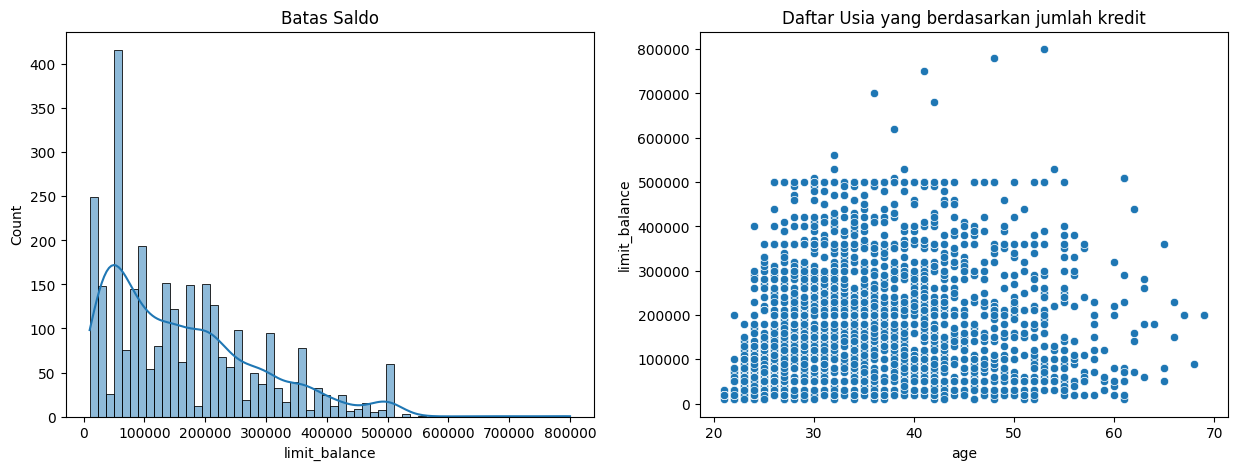

In [7]:
# Membuat Histogram dan Scatter Plot
# bikin kanvas
plt.figure(figsize=(15,5))                              #untuk bikin canvas, 15 itu panjangnya, 5 lebarnya

# Plot 1 taruh dikiri
plt.subplot(1, 2, 1)                                    #untuk bikin kolom 1 (1(untuk baris), 2(untuk kolom), 1(pilih kolom mana yang mau ditampilkan))
sns.histplot(df_1['limit_balance'],kde=True, bins=60)           #untuk bikin grafik, kde itu untuk bikin gari miringnya, binsnya itu banyak batangnya
plt.title('Batas Saldo')                                      #judul grafik

# Plot 2 taruh dikanan
plt.subplot(1, 2, 2)                                    #untuk bikin kolom 2
sns.scatterplot(x='age',y='limit_balance',data=df_1)    #untuk bikin grafik
plt.title('Daftar Usia yang berdasarkan jumlah kredit')

# tampilkan plot
plt.show

C:\Users\W1OPro\AppData\Local\Temp\ipykernel_17660\3940846136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_1["marital_status"], palette="muted")


<function matplotlib.pyplot.show(close=None, block=None)>

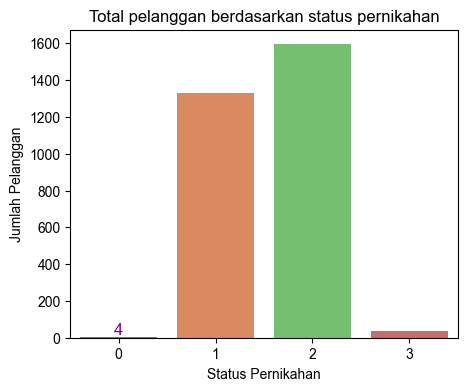

In [8]:
# Plot 3 
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=df_1["marital_status"], palette="muted")
sns.set(style="whitegrid")                                      # Opsi ini menambahkan grid pada plot
ax.bar_label(ax.containers[0], color="purple", fontsize=12)     # Menambahkan label di atas bar
plt.title("Total pelanggan berdasarkan status pernikahan")
plt.xlabel("Status Pernikahan")                 # Mengganti ylabel menjadi xlabel
plt.ylabel("Jumlah Pelanggan")
plt.show


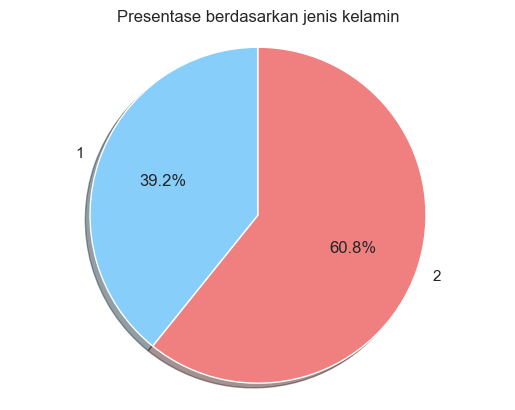

In [9]:
# Plot 4
surge_count = df_1.groupby('sex').size().reset_index(name='count')
colors = ['lightskyblue', 'lightcoral']

plt.title('Presentase berdasarkan jenis kelamin')
plt.pie(data=surge_count, x='count', labels='sex', colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

Dari hasil grafik diatas terlihat bahwa pelanggan berjenis kelamin wanita jauh lebih banyak daripada laki-laki.

C:\Users\W1OPro\AppData\Local\Temp\ipykernel_17660\772018697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_1["education_level"], palette="muted")


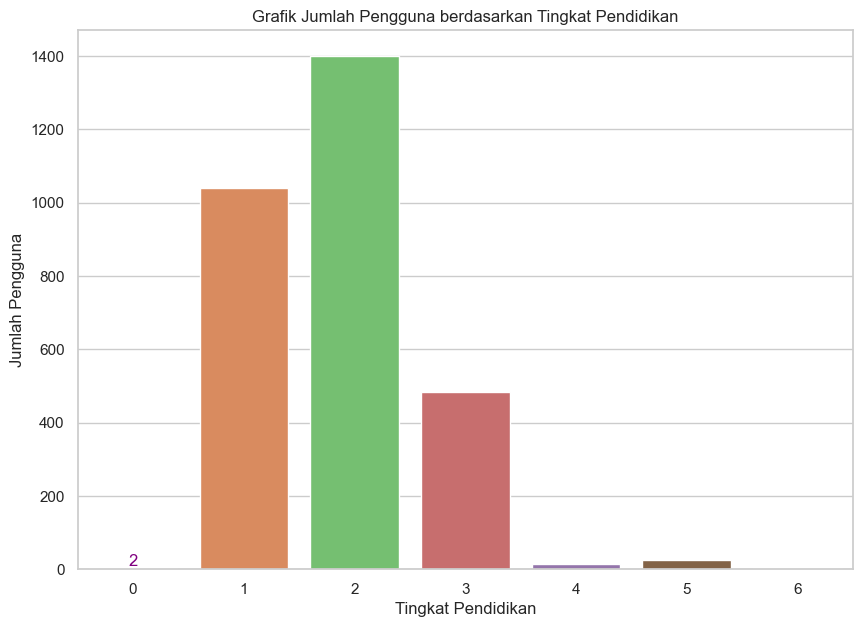

In [10]:
# Plot 5 
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df_1["education_level"], palette="muted")
sns.set(style="whitegrid")                                      # Opsi ini menambahkan grid pada plot
ax.bar_label(ax.containers[0], color="purple", fontsize=12)     # Menambahkan label di atas bar
plt.title("Grafik Jumlah Pengguna berdasarkan Tingkat Pendidikan")
plt.xlabel("Tingkat Pendidikan")                               # Mengganti ylabel menjadi xlabel
plt.ylabel("Jumlah Pengguna")
plt.show()  

Dari hasil grafik diatas terlihat bahwa pengguna dengan tingkat pendidikan 2 (Universitas) jauh lebih banyak daripada pengguna dengan tingkat pendidikan (SMA).

In [11]:
# Groupby
name_count = df_1.groupby('default_payment_next_month').size().sort_values(ascending= False).reset_index(name='limit_balance')
name_count

,default_payment_next_month,limit_balance
0,0,2330
1,1,635


Dari hasil diatas kita groupby kolom `default_payment_next_month` dan kolom `limit_balance`nya agar bisa kita tampilkan grafiknya dan kita analisa apakah kolom `limit_balance` mempengaruhi pelanggan untuk membeli atau tidak.

C:\Users\W1OPro\AppData\Local\Temp\ipykernel_17660\655377333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = name_count, x = 'default_payment_next_month', y= 'limit_balance', palette="muted")


<Axes: xlabel='default_payment_next_month', ylabel='limit_balance'>

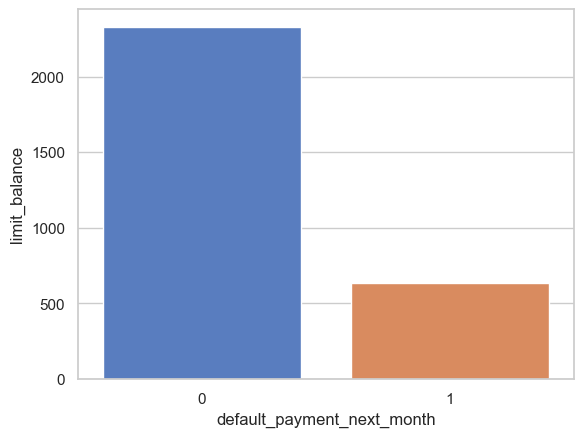

In [12]:
# Plot 6 
sns.barplot(data = name_count, x = 'default_payment_next_month', y= 'limit_balance', palette="muted")

C:\Users\W1OPro\AppData\Local\Temp\ipykernel_17660\4207869133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_1["age"], palette="muted")


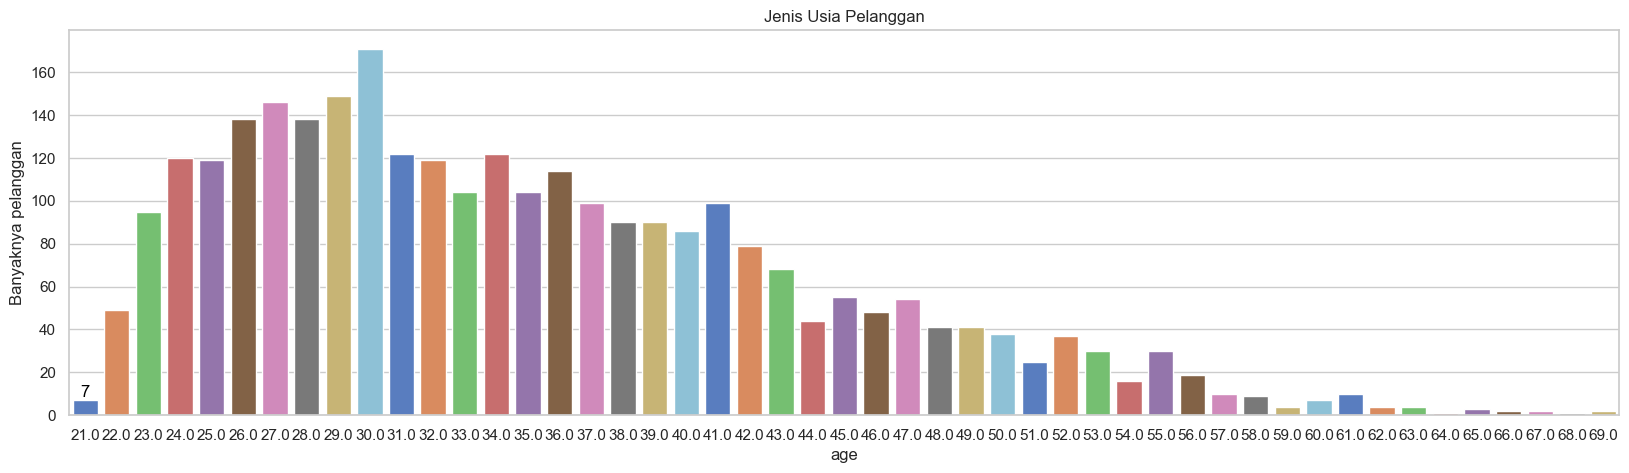

In [13]:
# Plot 7
plt.figure(figsize = (20,5))
ax = sns.countplot(x = df_1["age"], palette="muted")
ax.bar_label(ax.containers[0], color = "black")
plt.title("Jenis Usia Pelanggan")
plt.ylabel("Banyaknya pelanggan")
plt.show()

Dari hasil grafik diatas dapat kita simpulkan bahwa pelanggan dengan usia 30 adalah yang terbanyak, sedangkan pelanggan dengan usia diatas 55 tidak terlalu banyak dan rata-rata pelanggannya kurang dari 20.

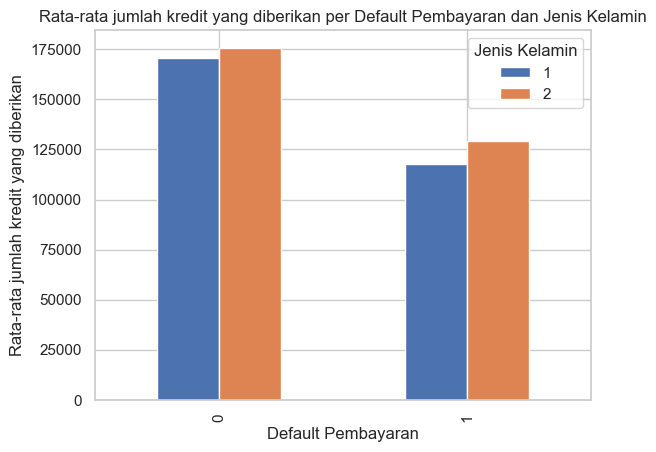

In [14]:
# Rumus grouping dalam satu kolom
grouped_data = df_1.groupby(['default_payment_next_month', 'sex'])['limit_balance'].mean()

# Membuat diagram batang (bar chart)
grouped_data.unstack().plot(kind='bar')
plt.title('Rata-rata jumlah kredit yang diberikan per Default Pembayaran dan Jenis Kelamin')
plt.xlabel('Default Pembayaran')
plt.ylabel('Rata-rata jumlah kredit yang diberikan')
plt.legend(title='Jenis Kelamin', title_fontsize='12', loc='upper right')
plt.show()

Dari hasil diagram diatas dapat kita simpulkan bahwa rata-rata jumlah kredit yang diberikan kepada pelanggan berdasarkan default pembayaran cenderung lebih banyak yang tidak membayar ketimbang yang sudah membayar.

---

# vi. Feature Engineering

Pada bagian ini kita akan melakukan proses penyiapan data untuk memproses pelatihan model, contohnya seperti pembagian data `X` dan `y` nya, pembagian data train-test, transformasi data, dan proses lainnya yang dibutuhkan.

### 1. Handling Missing Values

In [15]:
# Memeriksa nilai yang hilang dalam setiap kolom
missing_values = df_1.isnull().sum()

# Menampilkan jumlah nilai yang hilang dalam setiap kolom
missing_values

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

Karena tidak terdapat missing value pada setiap kolomnya, maka kita tidak perlu melakukan handling missing value.

### 2. Membuat sampel data inference

In [16]:
# menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df_1.sample(1, random_state=42)

# menghapus data inference dari df
df_1.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df_1.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Export data Inference
data_inf.to_csv('data_inf.csv',index=False)

Untuk mendrop satu baris dari keseluruhan data yang nanti akan kita jadikan bahan untuk prediksi.

### 3. Split between columns X (Feature/Variables) and y (Target)

In [17]:
# Split antara 'X' dan 'y'
X = df_1.drop(['default_payment_next_month'],axis=1)
y = df_1.default_payment_next_month
X.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0


Untuk memisahkan antara target dan fitur.

Variable (X) ini berisi berbagai kolom informasi tentang data `credit_card_default` seperti : 
- 'limit_balance'
- 'sex'
- 'education_level'
- 'marital_status'
- 'age'
- 'pay_0'
- 'pay_2'
- 'pay_3'
- 'pay_4'
- 'pay_5'
- 'pay_6'
- 'bill_amt_1'
- 'bill_amt_2'
- 'bill_amt_3'
- 'bill_amt_4'
- 'bill_amt_5'
- 'bill_amt_6'
- 'pay_amt_1'
- 'pay_amt_2'
- 'pay_amt_3'
- 'pay_amt_4'
- 'pay_amt_5'
- 'pay_amt_6'

Variable (y) ini berisi data target yaitu :

kolom `default_payment_next_month` yang akan digunakan pada label ini yaitu sebagai target(y) saat membangun model dalam melakukan analisis lebih lanjut.

### 4. Split between Train-set and Test-set

In [18]:
# Splitting between Train and Tet using 'train_test_split()'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)     #test size 0.2 artinya 20% biasanya digunakan 0,2-0.25 dari seluruh data #random state harus di isi dengan nilai agar tidak berubah2 boleh dengan angka apapun

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (2371, 23)
Test Size : (593, 23)


Setelah dilakukan split diatas, hasil Train Size adalah (2371, 23), dan Test Size adalah (593, 23)

### 5. Outliers Handling

Saya melakukan outliers handling untuk menghandle outliers dengan menggunakan metode caping.

#### A. Check distribusi

Pada proses kali ini kita akan melakukan check distribusi pada kategori numerical untuk mengetahui mana yang skewness dan mana yang distribusinya normal.

pada bagian ini kita akan melakukan :
- Menentukan data distribusi apakah termasuk normal atau tidak normal
- Menampilkan distribusi melalui diagram/grafik
- Memastikan nilai upper wounder dan lower bounder
- Menghandling fitur/kolom yang memiliki outlier

In [19]:
# cek apakah distribusinya normal atau tidak
print('Distribution of column `limit_balance`           : ', X_train['limit_balance'].skew())
print('Distribution of column `age`           : ', X_train['age'].skew())
print('Distribution of column `bill_amt_1`           : ', X_train['bill_amt_1'].skew())
print('Distribution of column `bill_amt_2`           : ', X_train['bill_amt_2'].skew())
print('Distribution of column `bill_amt_3`           : ', X_train['bill_amt_3'].skew())
print('Distribution of column `bill_amt_4`           : ', X_train['bill_amt_4'].skew())
print('Distribution of column `bill_amt_5`           : ', X_train['bill_amt_5'].skew())
print('Distribution of column `bill_amt_6`           : ', X_train['bill_amt_6'].skew())
print('Distribution of column `pay_amt_1`           : ', X_train['pay_amt_1'].skew())
print('Distribution of column `pay_amt_2`           : ', X_train['pay_amt_2'].skew())
print('Distribution of column `pay_amt_3`           : ', X_train['pay_amt_3'].skew())
print('Distribution of column `pay_amt_4`           : ', X_train['pay_amt_4'].skew())
print('Distribution of column `pay_amt_5`           : ', X_train['pay_amt_5'].skew())
print('Distribution of column `pay_amt_6`           : ', X_train['pay_amt_6'].skew())


Distribution of column `limit_balance`           :  0.9923383930919971
Distribution of column `age`           :  0.8084417660551223
Distribution of column `bill_amt_1`           :  2.3956961358973143
Distribution of column `bill_amt_2`           :  2.3926125959767344
Distribution of column `bill_amt_3`           :  2.6003293533473912
Distribution of column `bill_amt_4`           :  2.4444264463328573
Distribution of column `bill_amt_5`           :  2.396489377052562
Distribution of column `bill_amt_6`           :  2.4424849294743796
Distribution of column `pay_amt_1`           :  11.42589317169486
Distribution of column `pay_amt_2`           :  30.379593647987285
Distribution of column `pay_amt_3`           :  7.793662856363744
Distribution of column `pay_amt_4`           :  8.767060468657471
Distribution of column `pay_amt_5`           :  11.95551425799603
Distribution of column `pay_amt_6`           :  10.156620776972938


Dapat kita simpulkan bahwa :
1. yang termasuk skew
- kolom `limit_balance` dan `age` termasuk skew normal (karena hasil nilainya > 0,6 dan < 1) yang berati memiliki outlier
- kolom `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6` termasuk extreme skew (karena hasil nilainya => 1) yang berati memiliki outlier
2. yang termasuk normal
- kolom `sex`, `education_level`, `marital_status`, `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6` merupakan normal distribution (karena termasuk kolom categorical) yang berati tidak memiliki outlier.

#### *- Menampilkan diagram distribusi* 

In [20]:
# membuat histogram dan boxplot dengan menggunakan kerangka data (df_1) dan variabel yang diinginkan sebagai argumen.

def diagnostic_plots(df_1, variable):
    # Tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_1[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_1[variable])
    plt.title('Boxplot')

    plt.show()

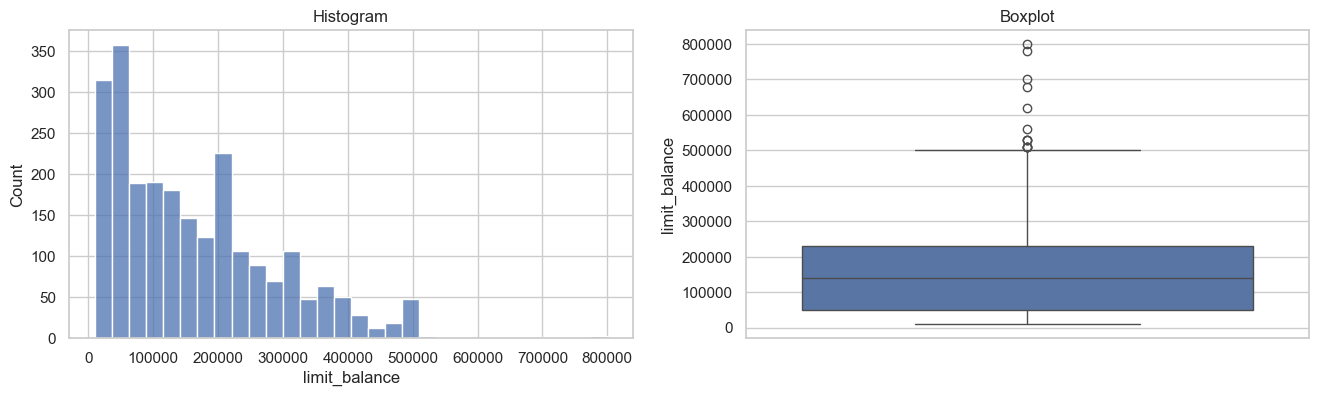

In [21]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'limit_balance')

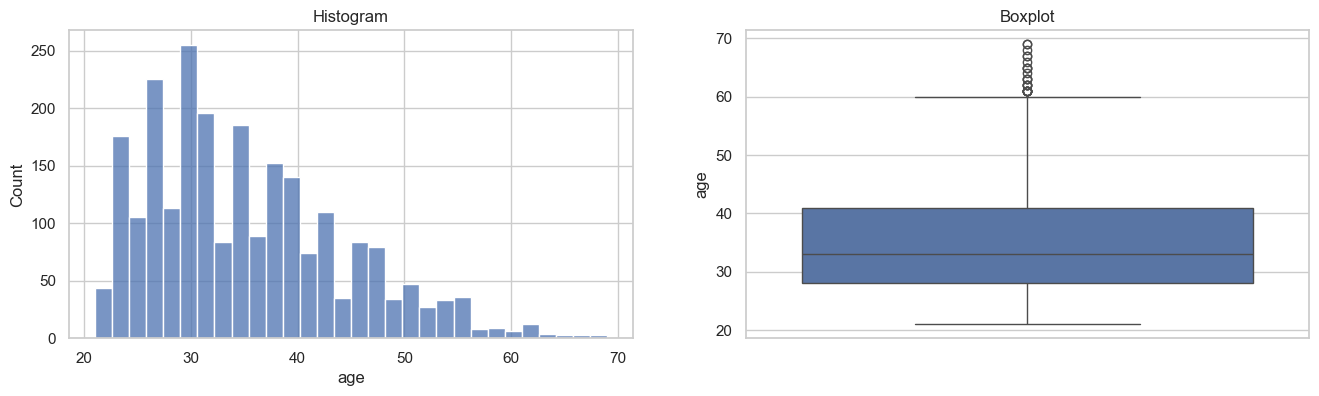

In [22]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'age')

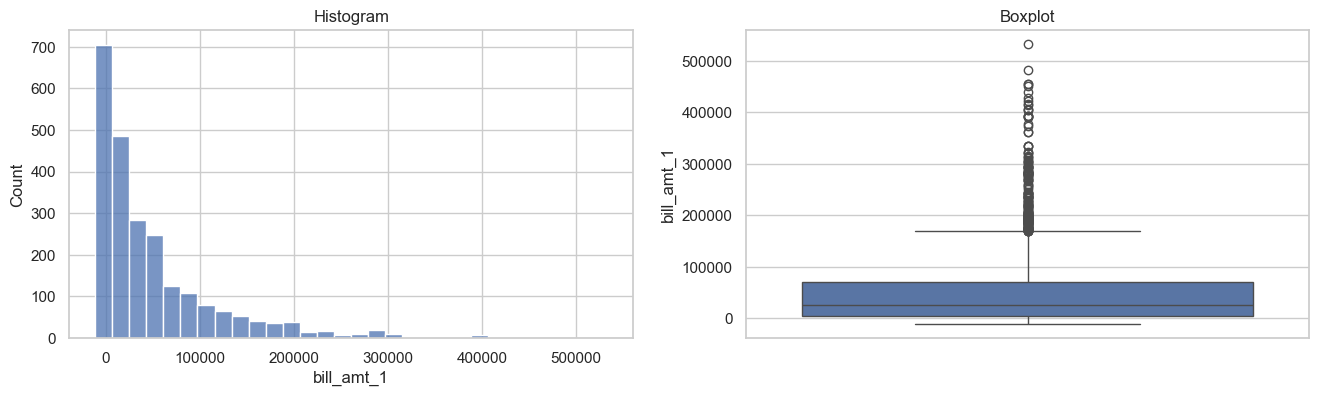

In [23]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'bill_amt_1')

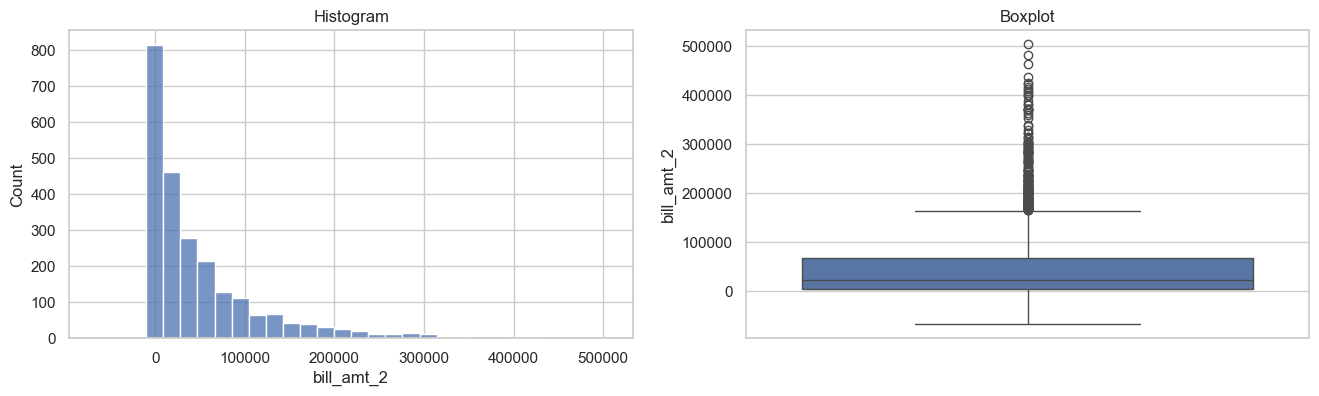

In [24]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'bill_amt_2')

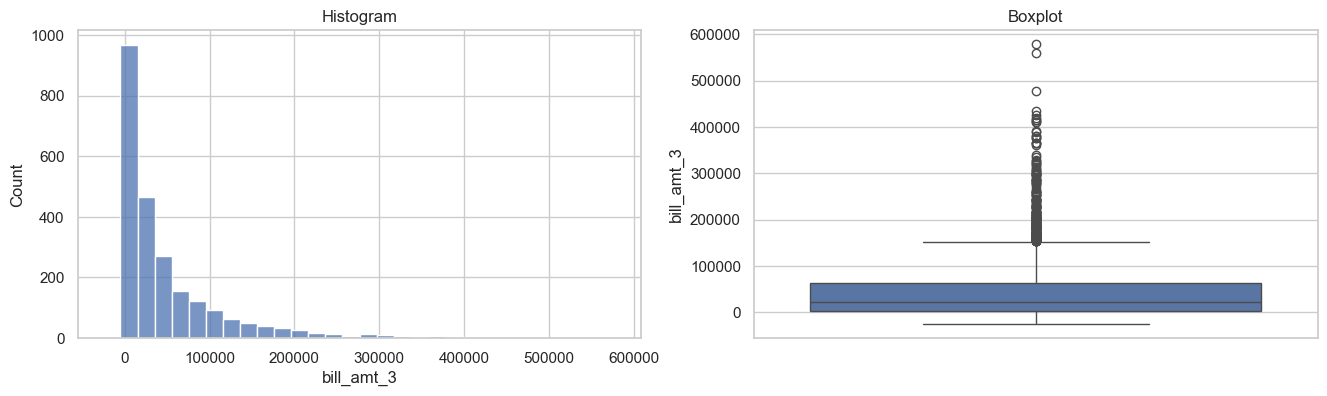

In [25]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'bill_amt_3')

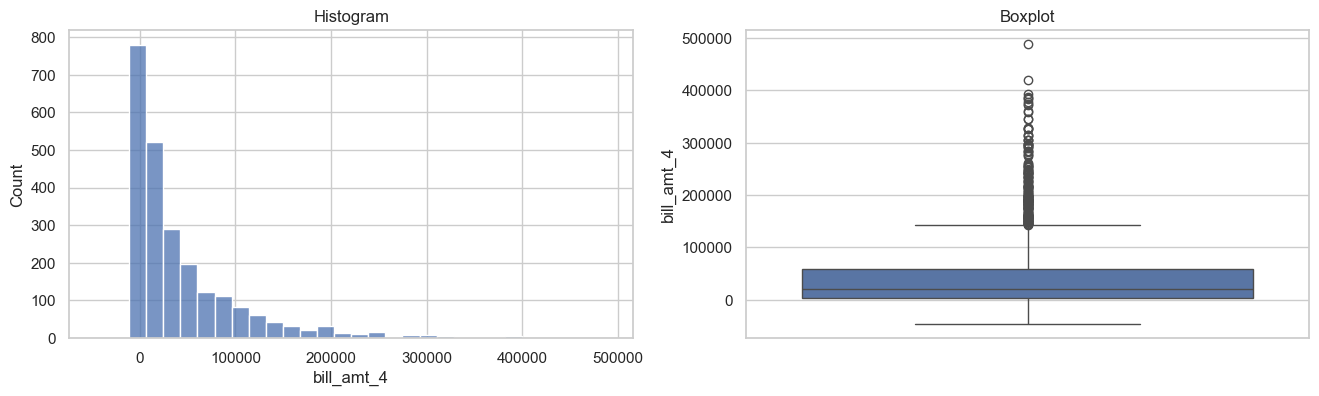

In [26]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'bill_amt_4')

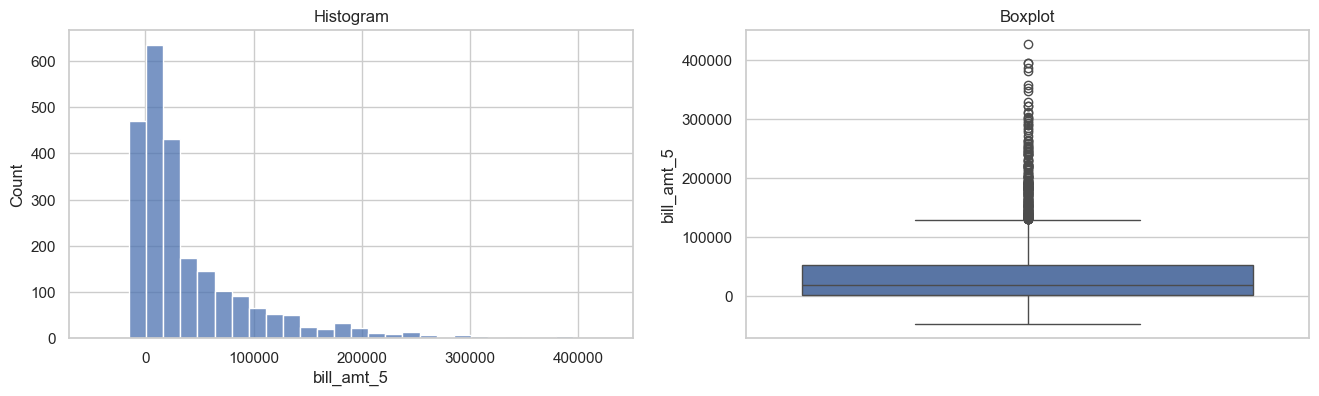

In [27]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'bill_amt_5')

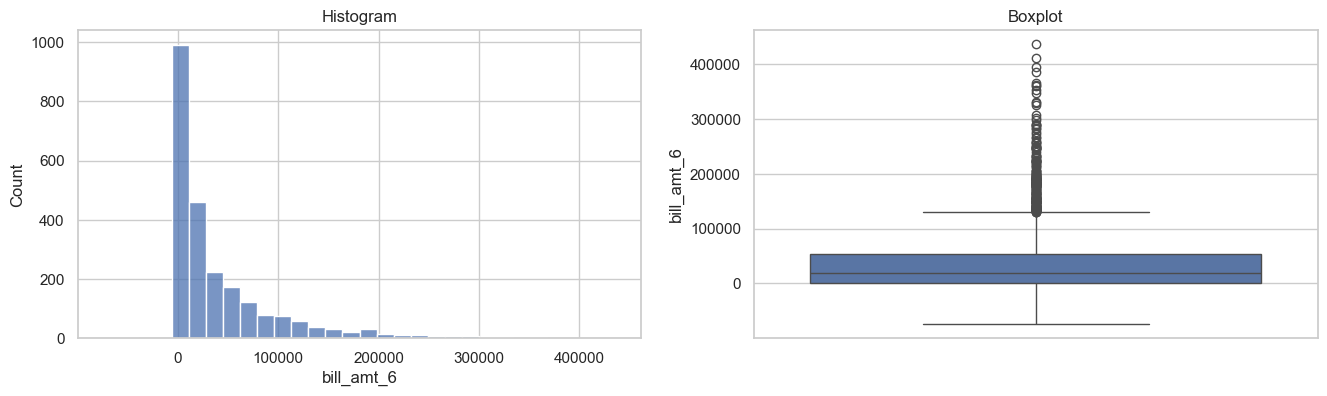

In [28]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'bill_amt_6')

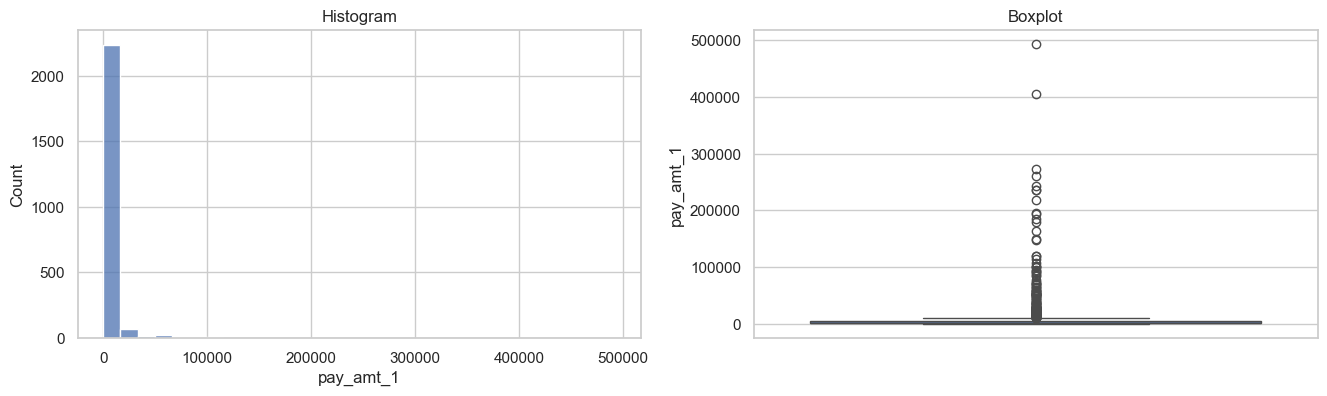

In [29]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'pay_amt_1')

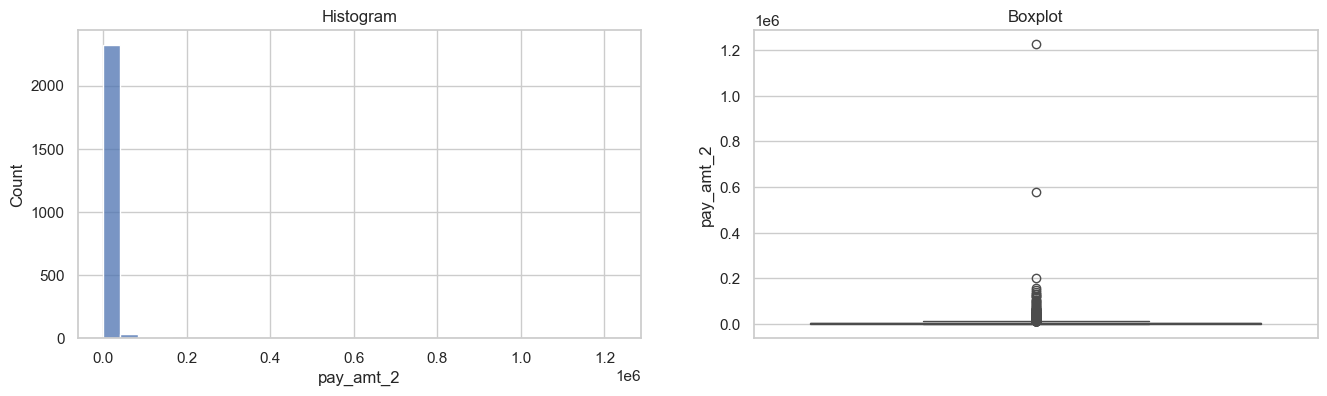

In [30]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'pay_amt_2')

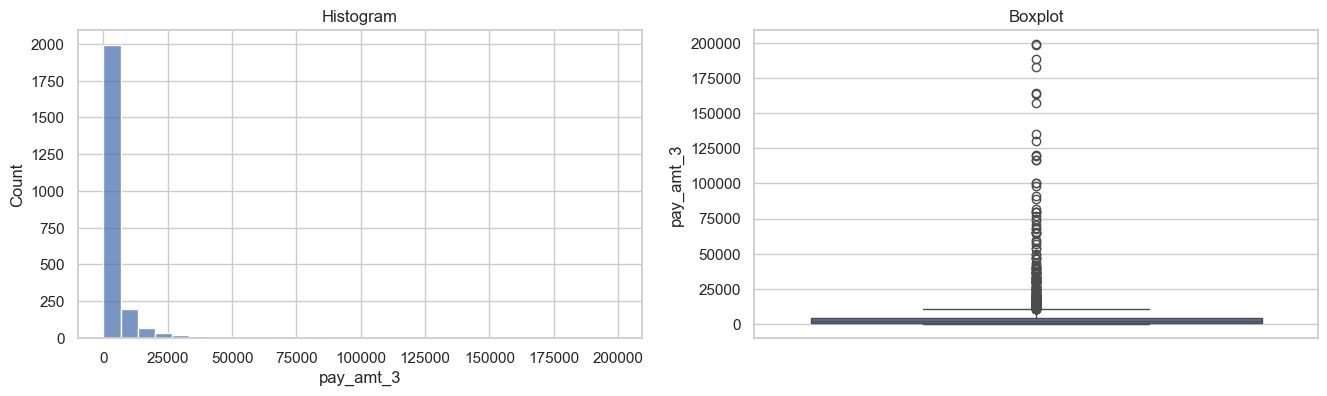

In [31]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'pay_amt_3')

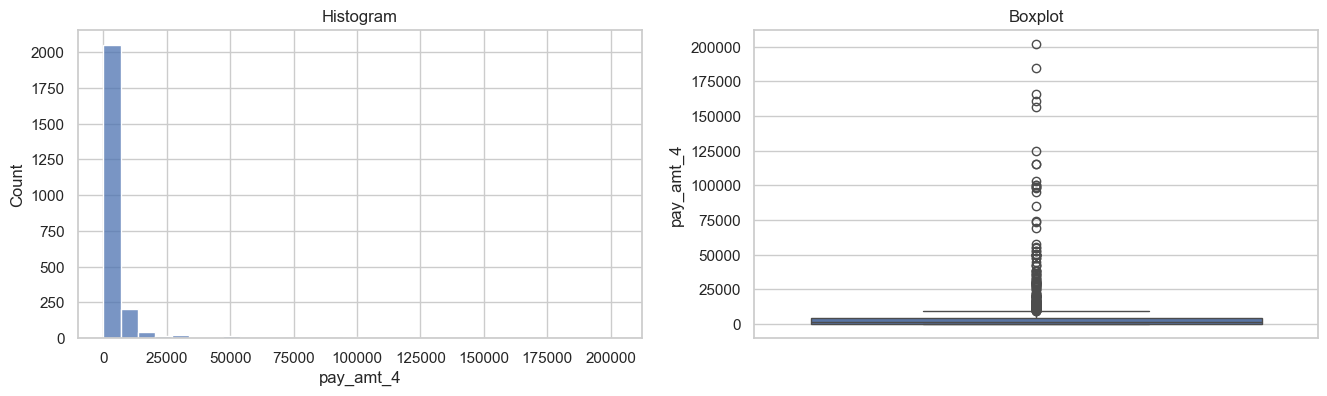

In [32]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'pay_amt_4')

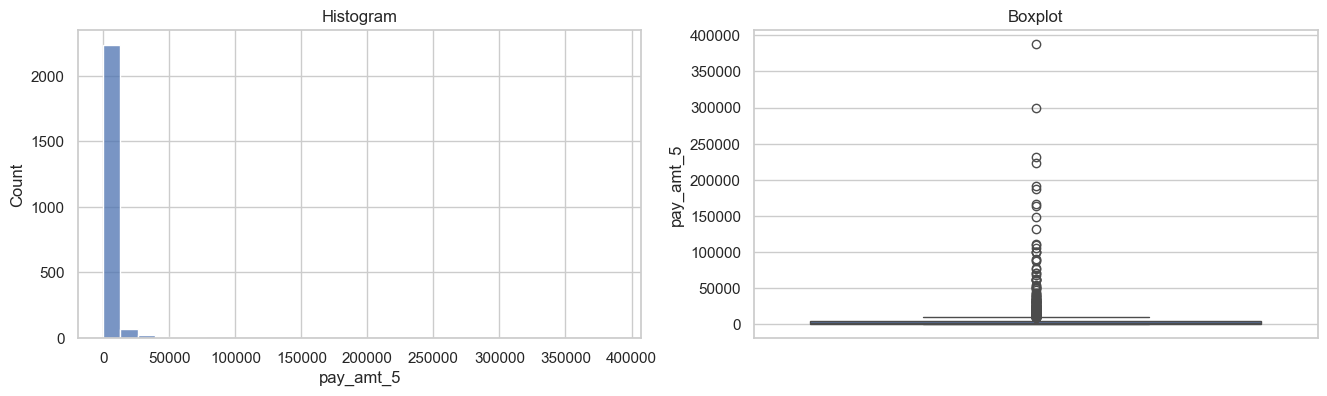

In [33]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'pay_amt_5')

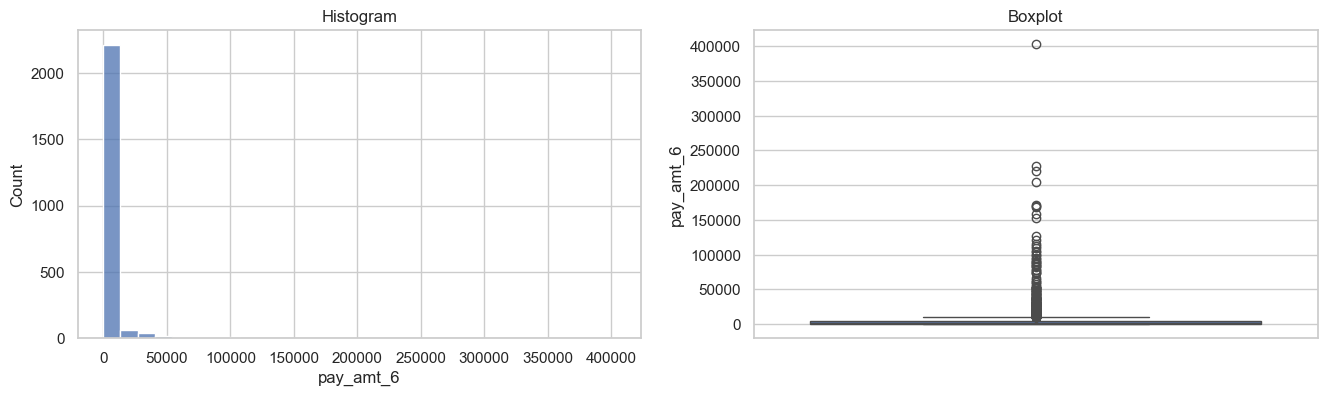

In [34]:
# visualisasi skewed distribution menggunakan boxplot
diagnostic_plots(X_train, 'pay_amt_6')

Bisa kita lihat dari diagram diatas terdapat outlier/distribusi skew pada kolom  `limit_balance`,`age`,`bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6`.

#### *- Memastikan nilai upper bounder dan lower bounder*

Pada tahap ini kita akan memastikan nilai upper bound dan lower bound untuk menjaga validitas data kita, menghindari kesalahan perhitungan pada data, dan mematuhi batasan yang ada dalam konteks tertentu. Dalam hal ini kita periksa apakah data kita sudah di antara upper bounder atau belum.

In [35]:
# Berfungsi untuk mencari batas atas dan bawah variabel yang terdistribusi normal
def find_normal_boundaries(df_1, variable):
    # Hitung batas luar yang merupakan outlier untuk distribusi Gaussian
    upper_boundary = df_1[variable].mean() + 3 * df_1[variable].std()
    lower_boundary = df_1[variable].mean() - 3 * df_1[variable].std()

    return upper_boundary, lower_boundary

In [36]:
numeric_data = ['limit_balance', 'age', 'bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5',
                'bill_amt_6', 'pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4',
                 'pay_amt_5','pay_amt_6' ]

for i in numeric_data:
    # Kita hitung batas luar yang merupakan outlier untuk distribusi yang miring
    IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
    # Jarak yang dilewati sebagai argumen, memberi kita pilihan untuk memperkirakan 1,5 kali atau 3 kali IQR untuk menghitung batasannya.
    lower_boundary_distance = X_train[i].quantile(0.25) - (IQR * 1.5)
    upper_boundary_distance = X_train[i].quantile(0.75) + (IQR * 1.5)

    print(f'upper boundary for {[i]} : {upper_boundary_distance}')
    print(f'lower boundary for {[i]} : {lower_boundary_distance}')
    print("---------------------------------------------------------")

upper boundary for ['limit_balance'] : 500000.0
lower boundary for ['limit_balance'] : -220000.0
---------------------------------------------------------
upper boundary for ['age'] : 60.5
lower boundary for ['age'] : 8.5
---------------------------------------------------------
upper boundary for ['bill_amt_1'] : 169026.75
lower boundary for ['bill_amt_1'] : -95307.25
---------------------------------------------------------
upper boundary for ['bill_amt_2'] : 164067.25
lower boundary for ['bill_amt_2'] : -93426.75
---------------------------------------------------------
upper boundary for ['bill_amt_3'] : 152994.5
lower boundary for ['bill_amt_3'] : -87001.5
---------------------------------------------------------
upper boundary for ['bill_amt_4'] : 142942.25
lower boundary for ['bill_amt_4'] : -81823.75
---------------------------------------------------------
upper boundary for ['bill_amt_5'] : 129854.5
lower boundary for ['bill_amt_5'] : -74725.5
--------------------------------

#### B. Melakukan Capping

In [37]:
# Capping skewed distribution
numeric_data = ['limit_balance', 'age', 'bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5',
                'bill_amt_6', 'pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4',
                'pay_amt_5','pay_amt_6' ]

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=numeric_data)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

# show skewness
print(f"Before: {X_train[numeric_data].skew()}")
print(f"After: {X_train_capped[numeric_data].skew()}")

Before: limit_balance     0.992338
age               0.808442
bill_amt_1        2.395696
bill_amt_2        2.392613
bill_amt_3        2.600329
bill_amt_4        2.444426
bill_amt_5        2.396489
bill_amt_6        2.442485
pay_amt_1        11.425893
pay_amt_2        30.379594
pay_amt_3         7.793663
pay_amt_4         8.767060
pay_amt_5        11.955514
pay_amt_6        10.156621
dtype: float64
After: limit_balance    0.984658
age              0.808442
bill_amt_1       1.770186
bill_amt_2       1.765147
bill_amt_3       1.757098
bill_amt_4       1.768558
bill_amt_5       1.740002
bill_amt_6       1.754588
pay_amt_1        1.618268
pay_amt_2        1.691176
pay_amt_3        1.815340
pay_amt_4        1.824106
pay_amt_5        1.824429
pay_amt_6        1.851780
dtype: float64


Bisa kita lihat dari hasil analisis diatas, dari sebelumnya tinggi menjadi sesudahnya rendah, yang dimana capping ini berfungsi untuk meringankan machine learning dalam memprogres datasetnya. Untuk lebih jelasnya bisa kita lihat pada diagramnya.

distance - Sebelum Capping


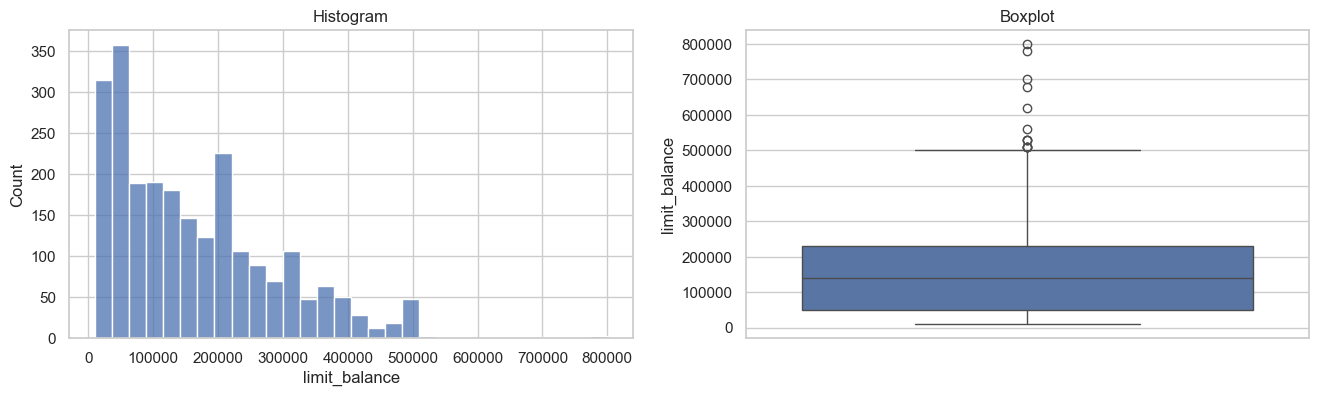


distance - Sesudah Capping


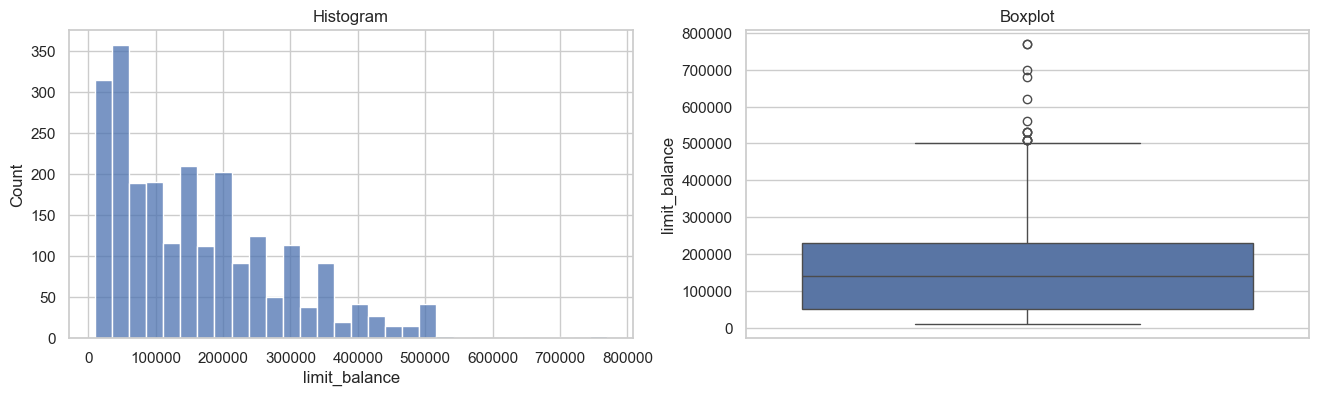

In [38]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'limit_balance')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'limit_balance')

distance - Sebelum Capping


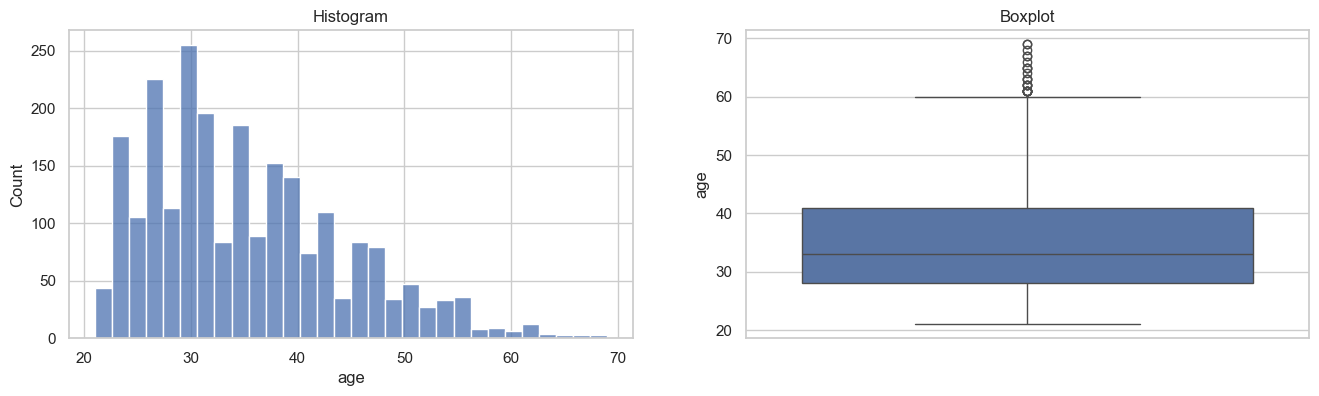


distance - Sesudah Capping


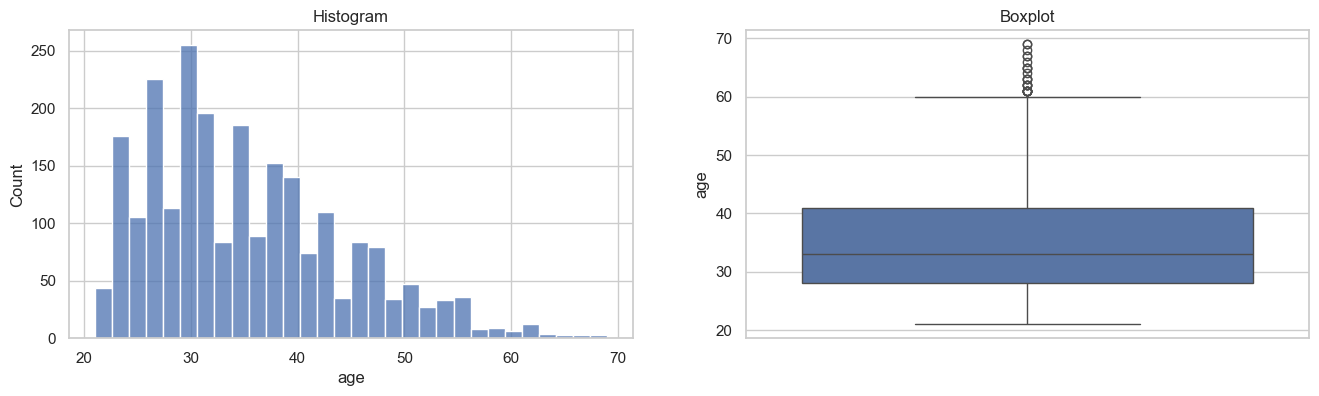

In [39]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'age')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'age')

distance - Sebelum Capping


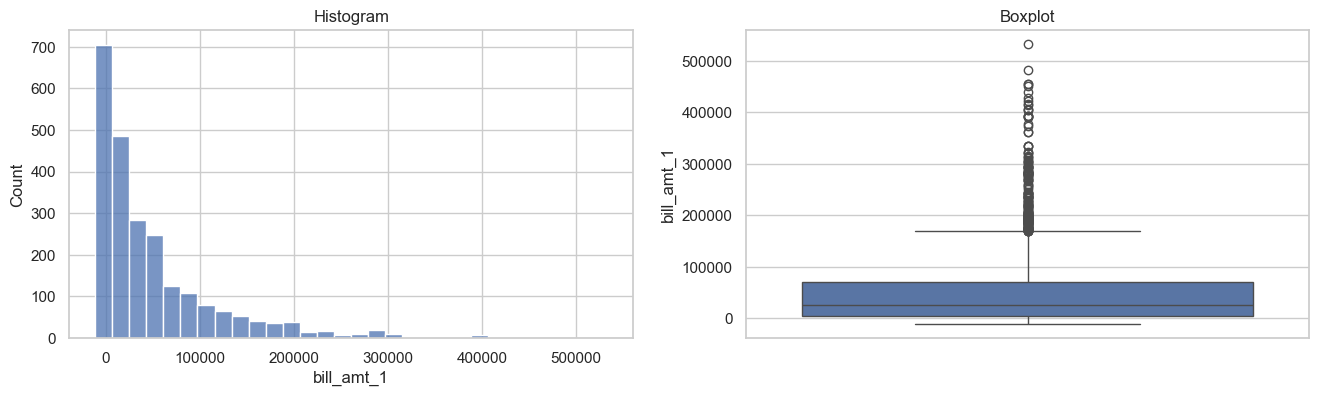


distance - Sesudah Capping


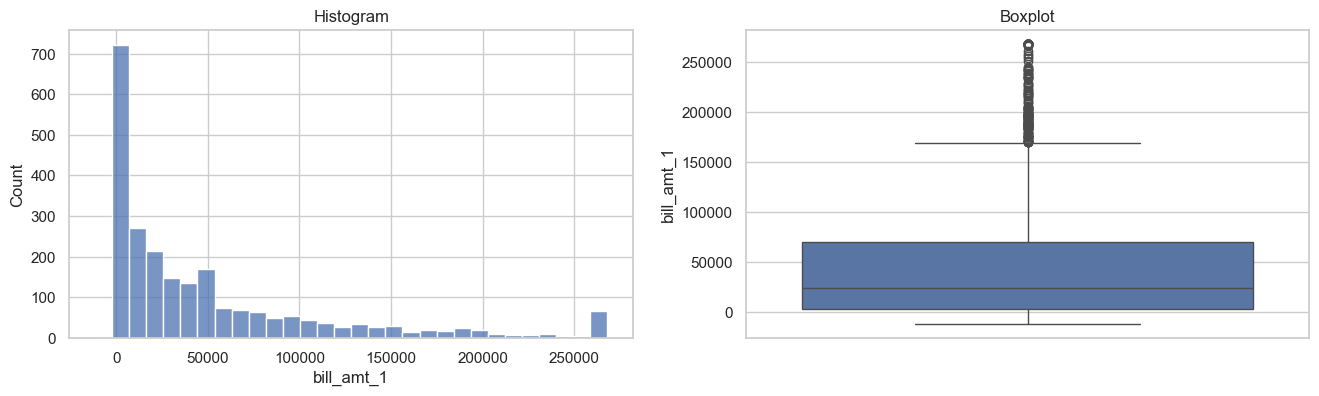

In [40]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'bill_amt_1')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'bill_amt_1')

distance - Sebelum Capping


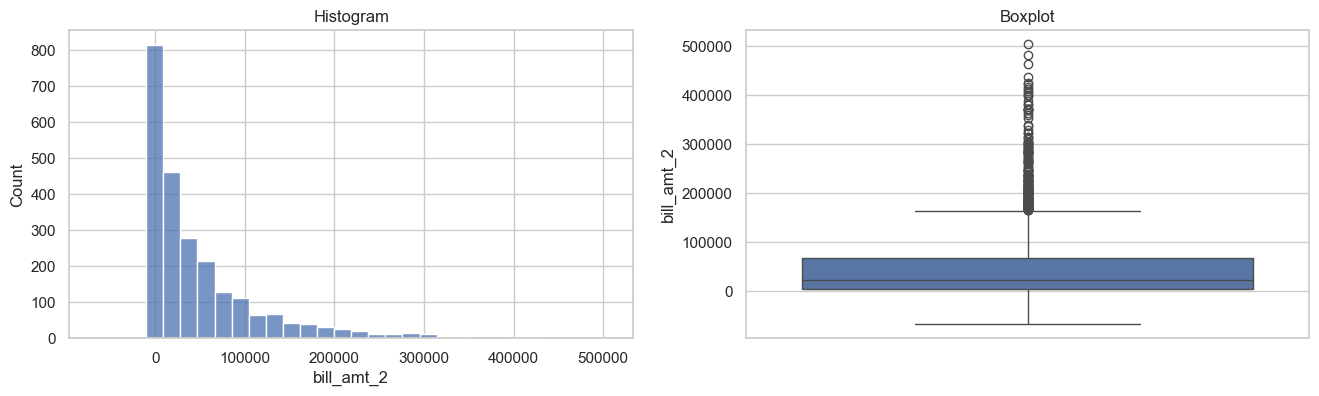


distance - Sesudah Capping


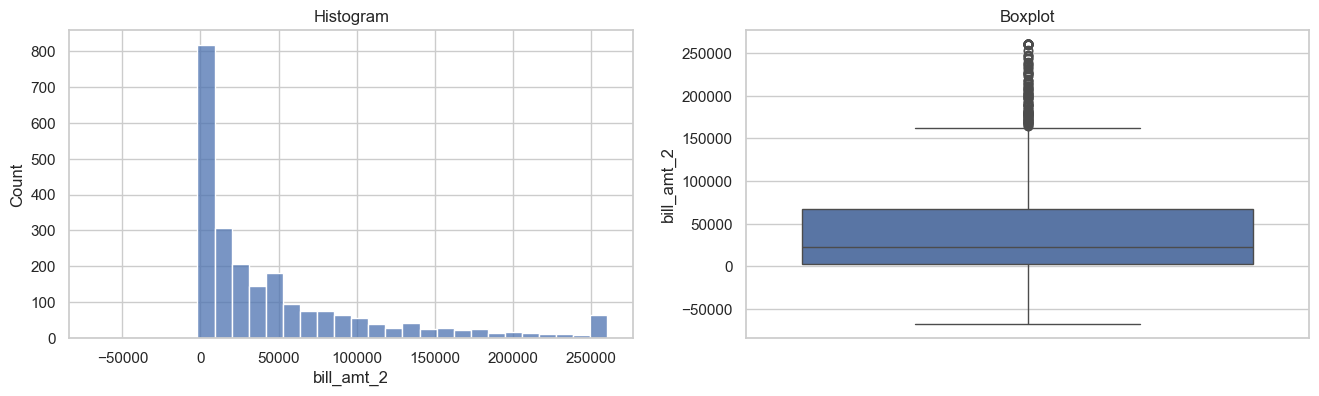

In [41]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'bill_amt_2')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'bill_amt_2')

distance - Sebelum Capping


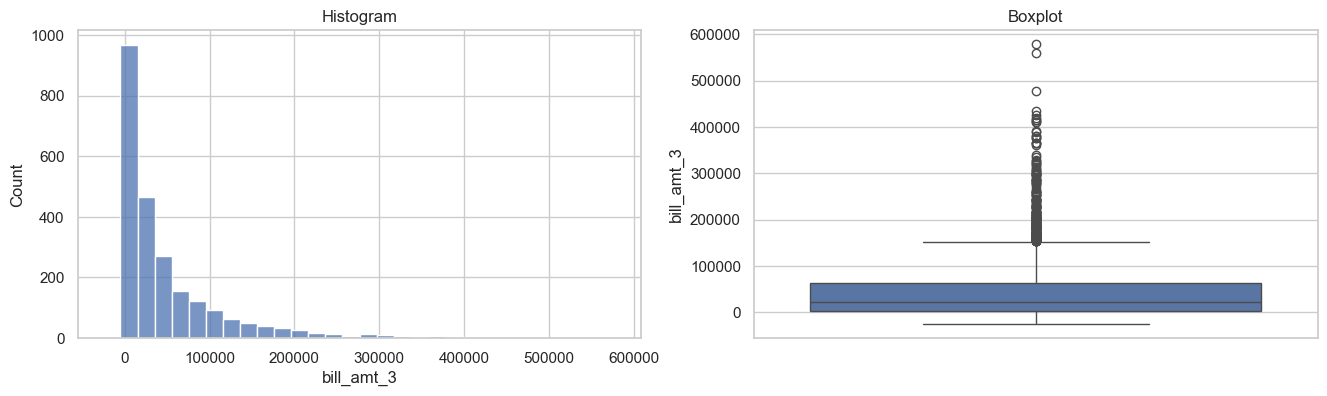


distance - Sesudah Capping


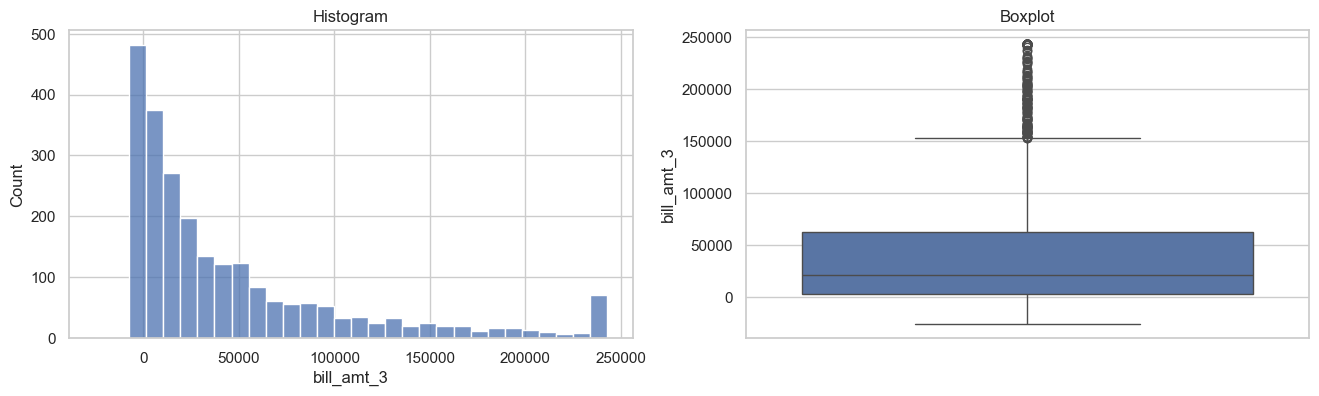

In [42]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'bill_amt_3')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'bill_amt_3')

distance - Sebelum Capping


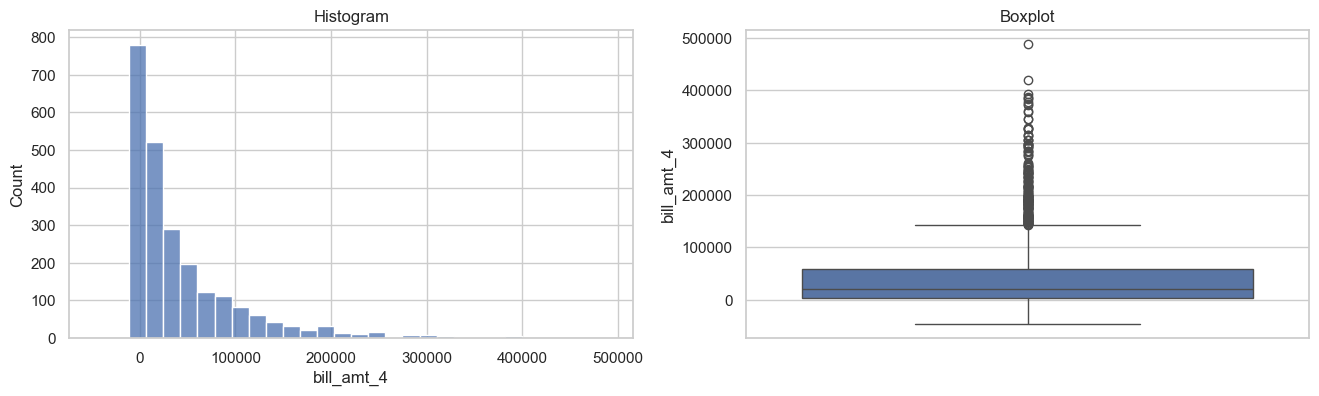


distance - Sesudah Capping


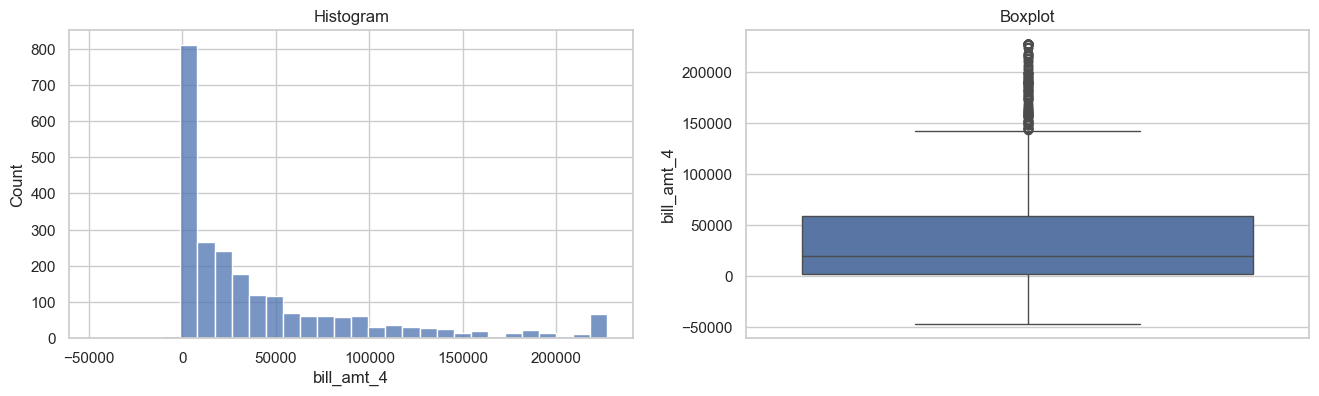

In [43]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'bill_amt_4')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'bill_amt_4')

distance - Sebelum Capping


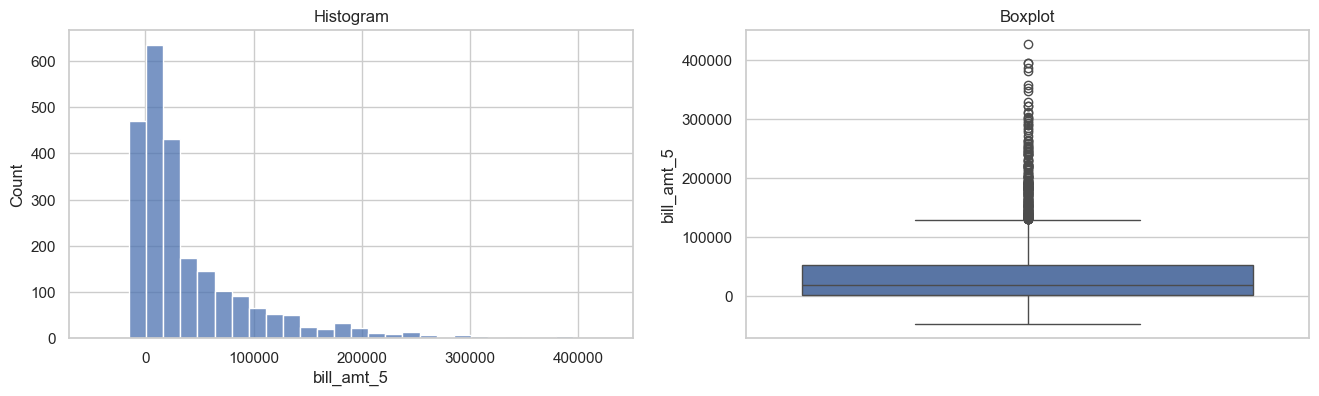


distance - Sesudah Capping


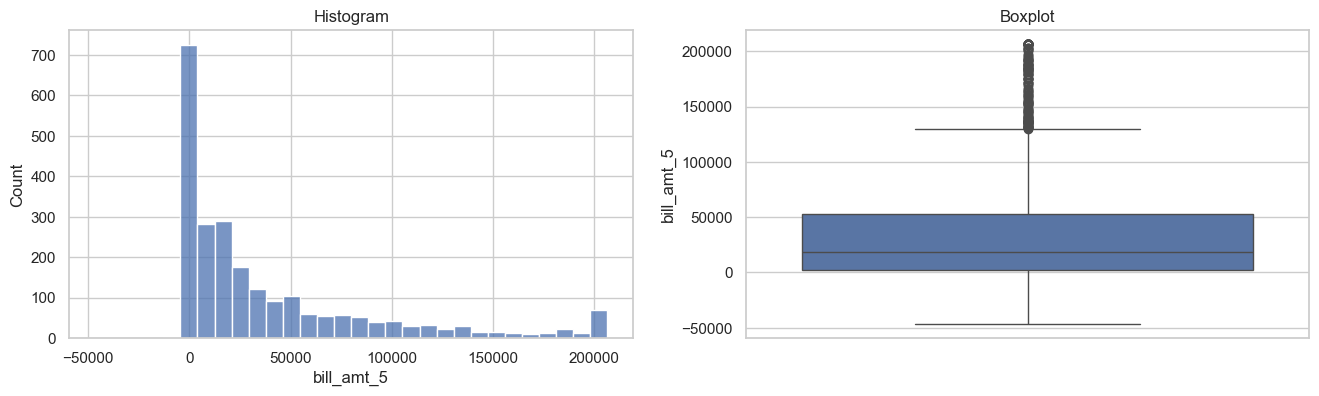

In [44]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'bill_amt_5')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'bill_amt_5')

distance - Sebelum Capping


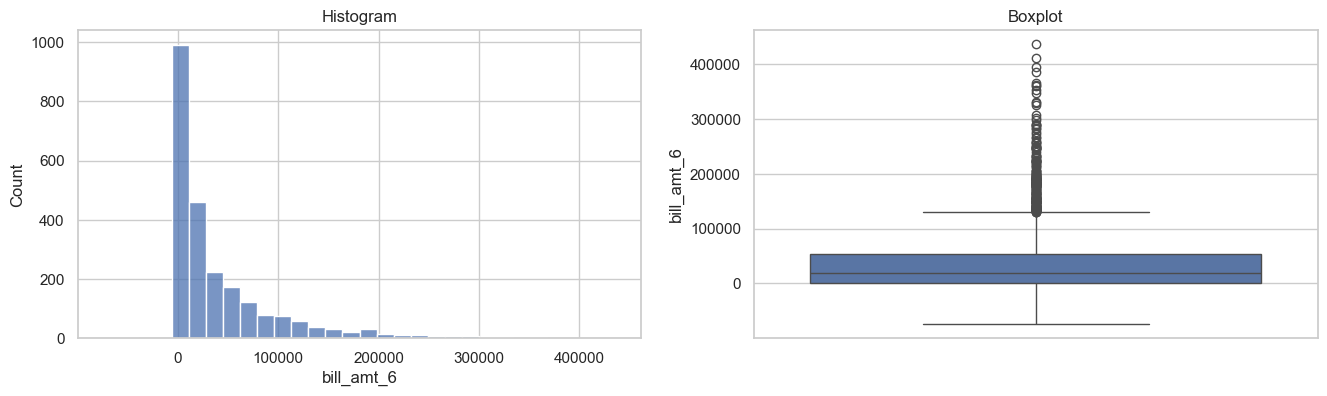


distance - Sesudah Capping


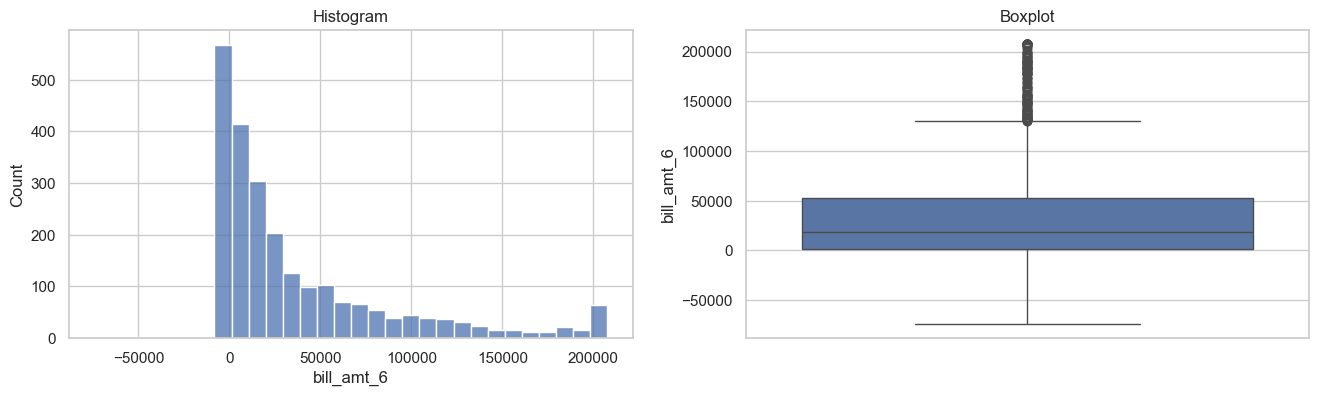

In [45]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'bill_amt_6')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'bill_amt_6')

distance - Sebelum Capping


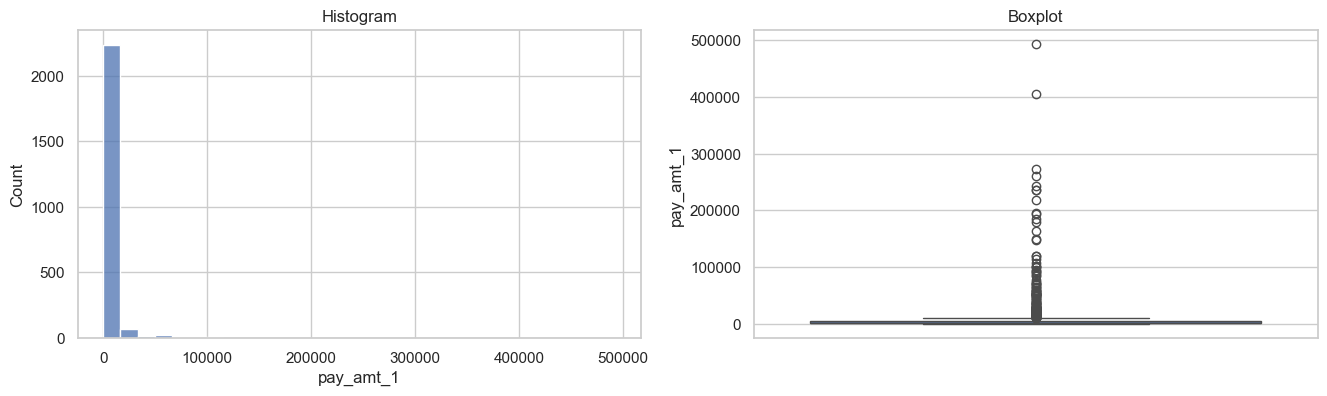


distance - Sesudah Capping


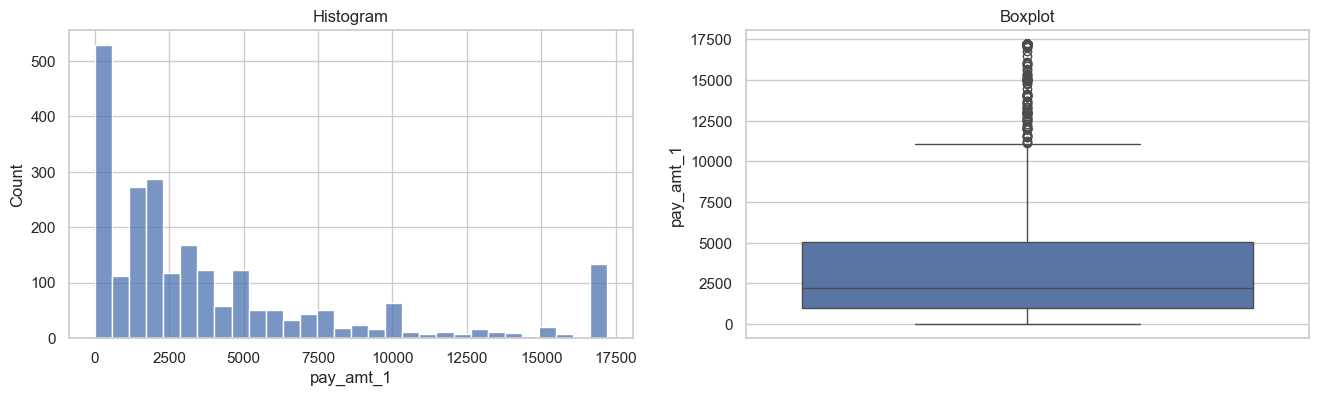

In [46]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'pay_amt_1')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'pay_amt_1')

distance - Sebelum Capping


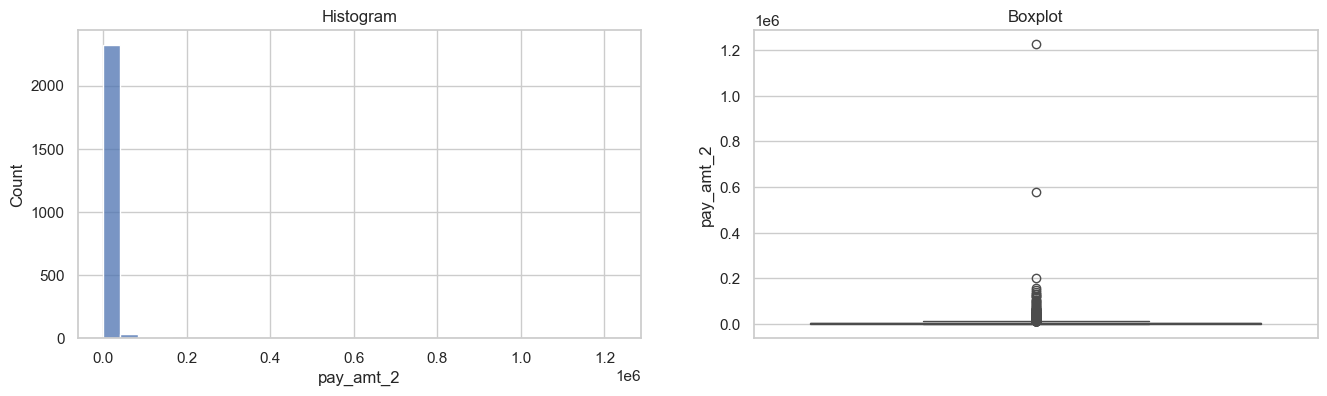


distance - Sesudah Capping


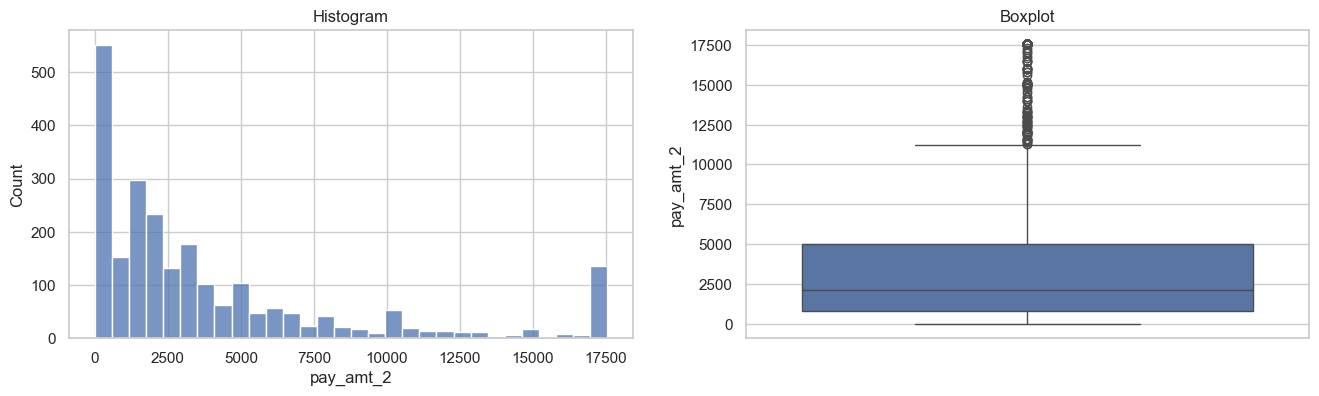

In [47]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'pay_amt_2')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'pay_amt_2')

distance - Sebelum Capping


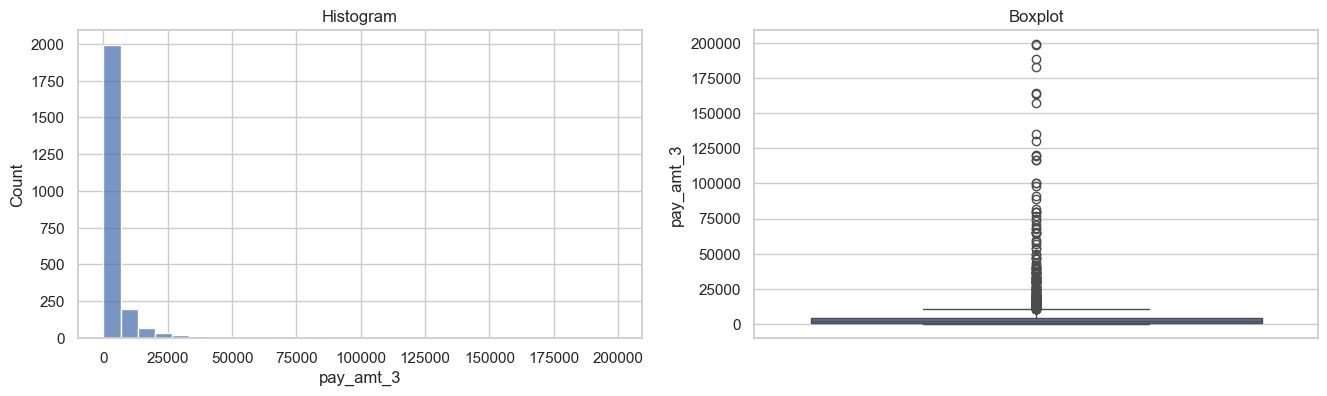


distance - Sesudah Capping


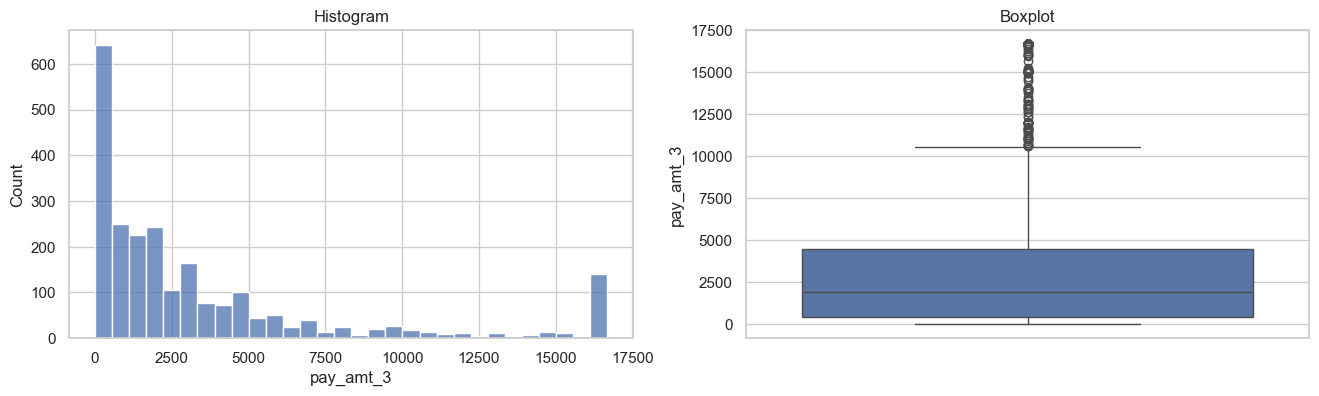

In [48]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'pay_amt_3')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'pay_amt_3')

distance - Sebelum Capping


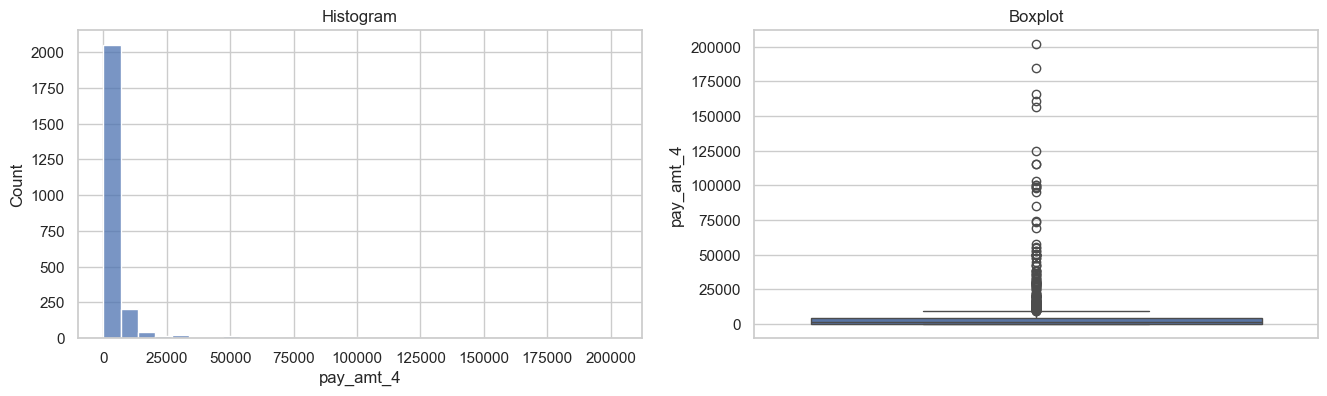


distance - Sesudah Capping


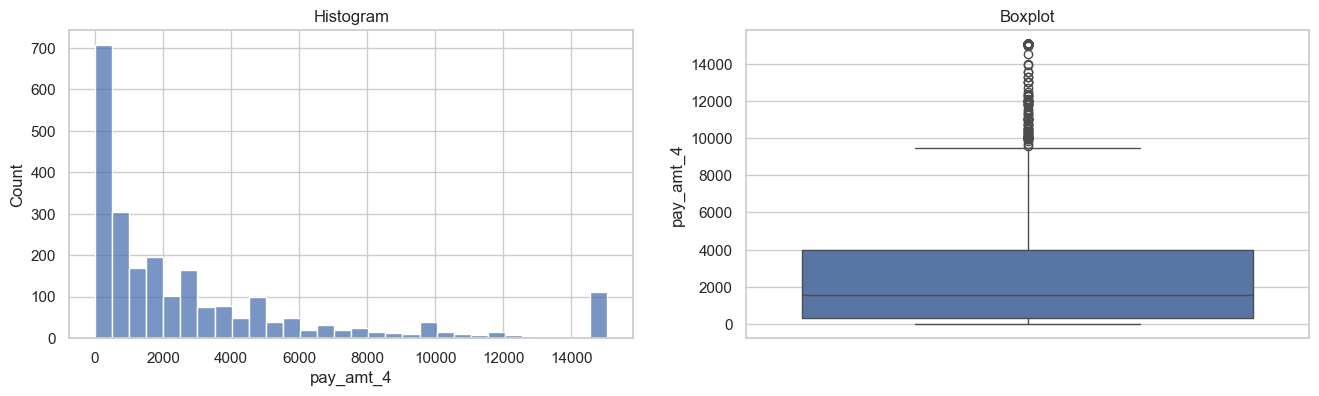

In [49]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'pay_amt_4')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'pay_amt_4')

distance - Sebelum Capping


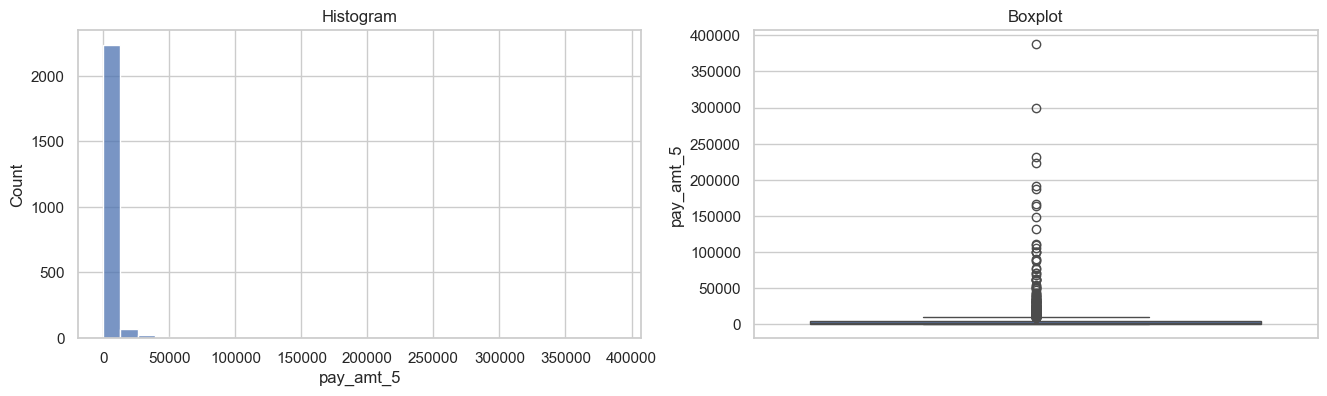


distance - Sesudah Capping


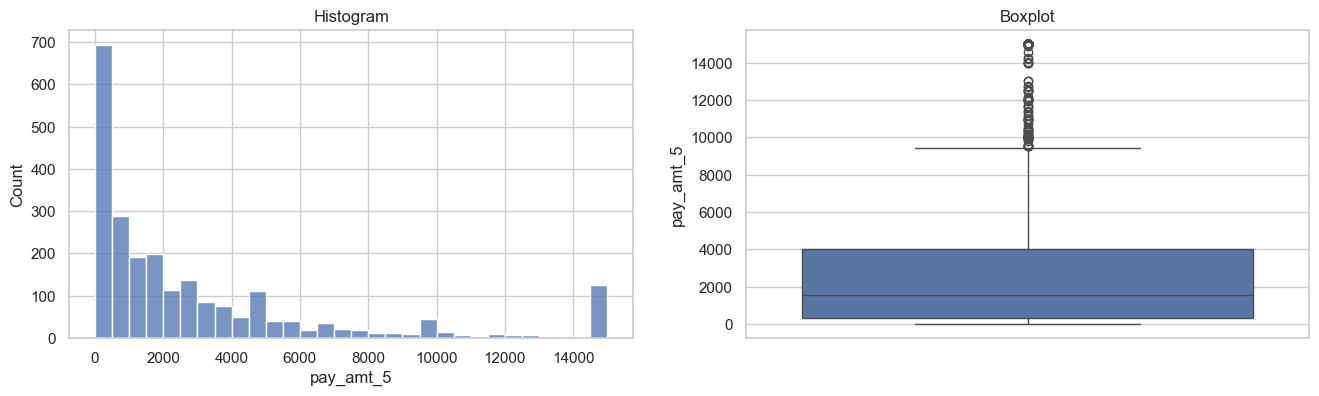

In [50]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'pay_amt_5')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'pay_amt_5')

distance - Sebelum Capping


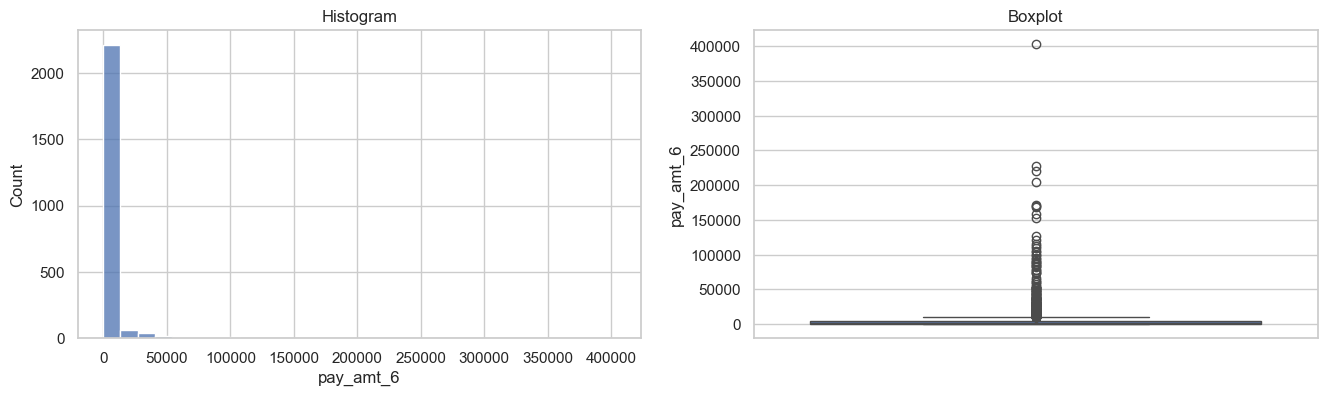


distance - Sesudah Capping


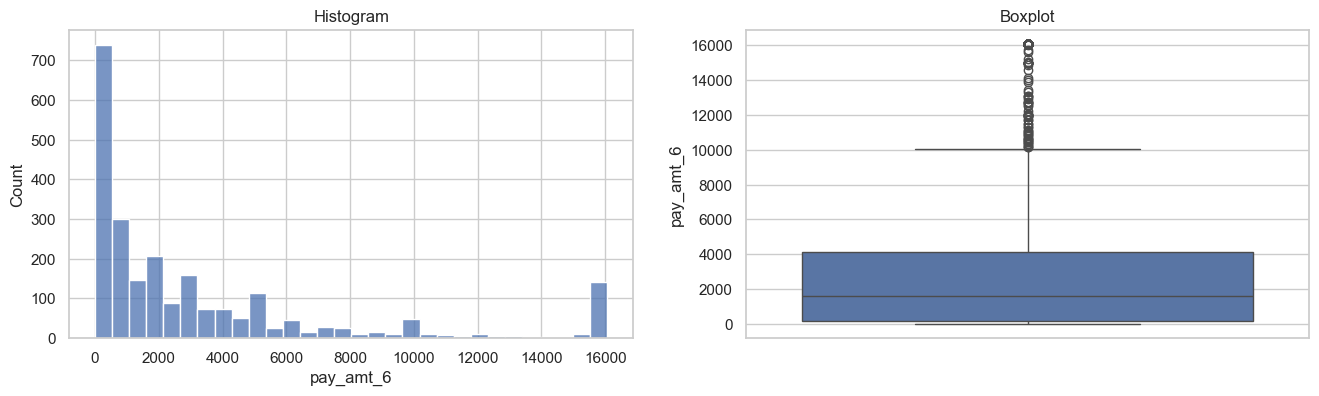

In [51]:
# menampilkan diagram sebelum di capping
print('distance - Sebelum Capping')
diagnostic_plots(X_train, 'pay_amt_6')

# menampilkan diagram setelah di capping
print('\ndistance - Sesudah Capping')
diagnostic_plots(X_train_capped, 'pay_amt_6')

### 6. Fiture Selection

Target yang akan kita capai yaitu membuat model regesi linear, hal yang pertama kita cari yaitu kolerasi antara kolom `default_payment_next_month`(y) dan kolom numerik(X) yang lain, langkah yang akan kita lakukan adalah membuat hitmap, kemudian melihat apakah ada korelasi dengan melihat scor yang di dapat dari corelasi.

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


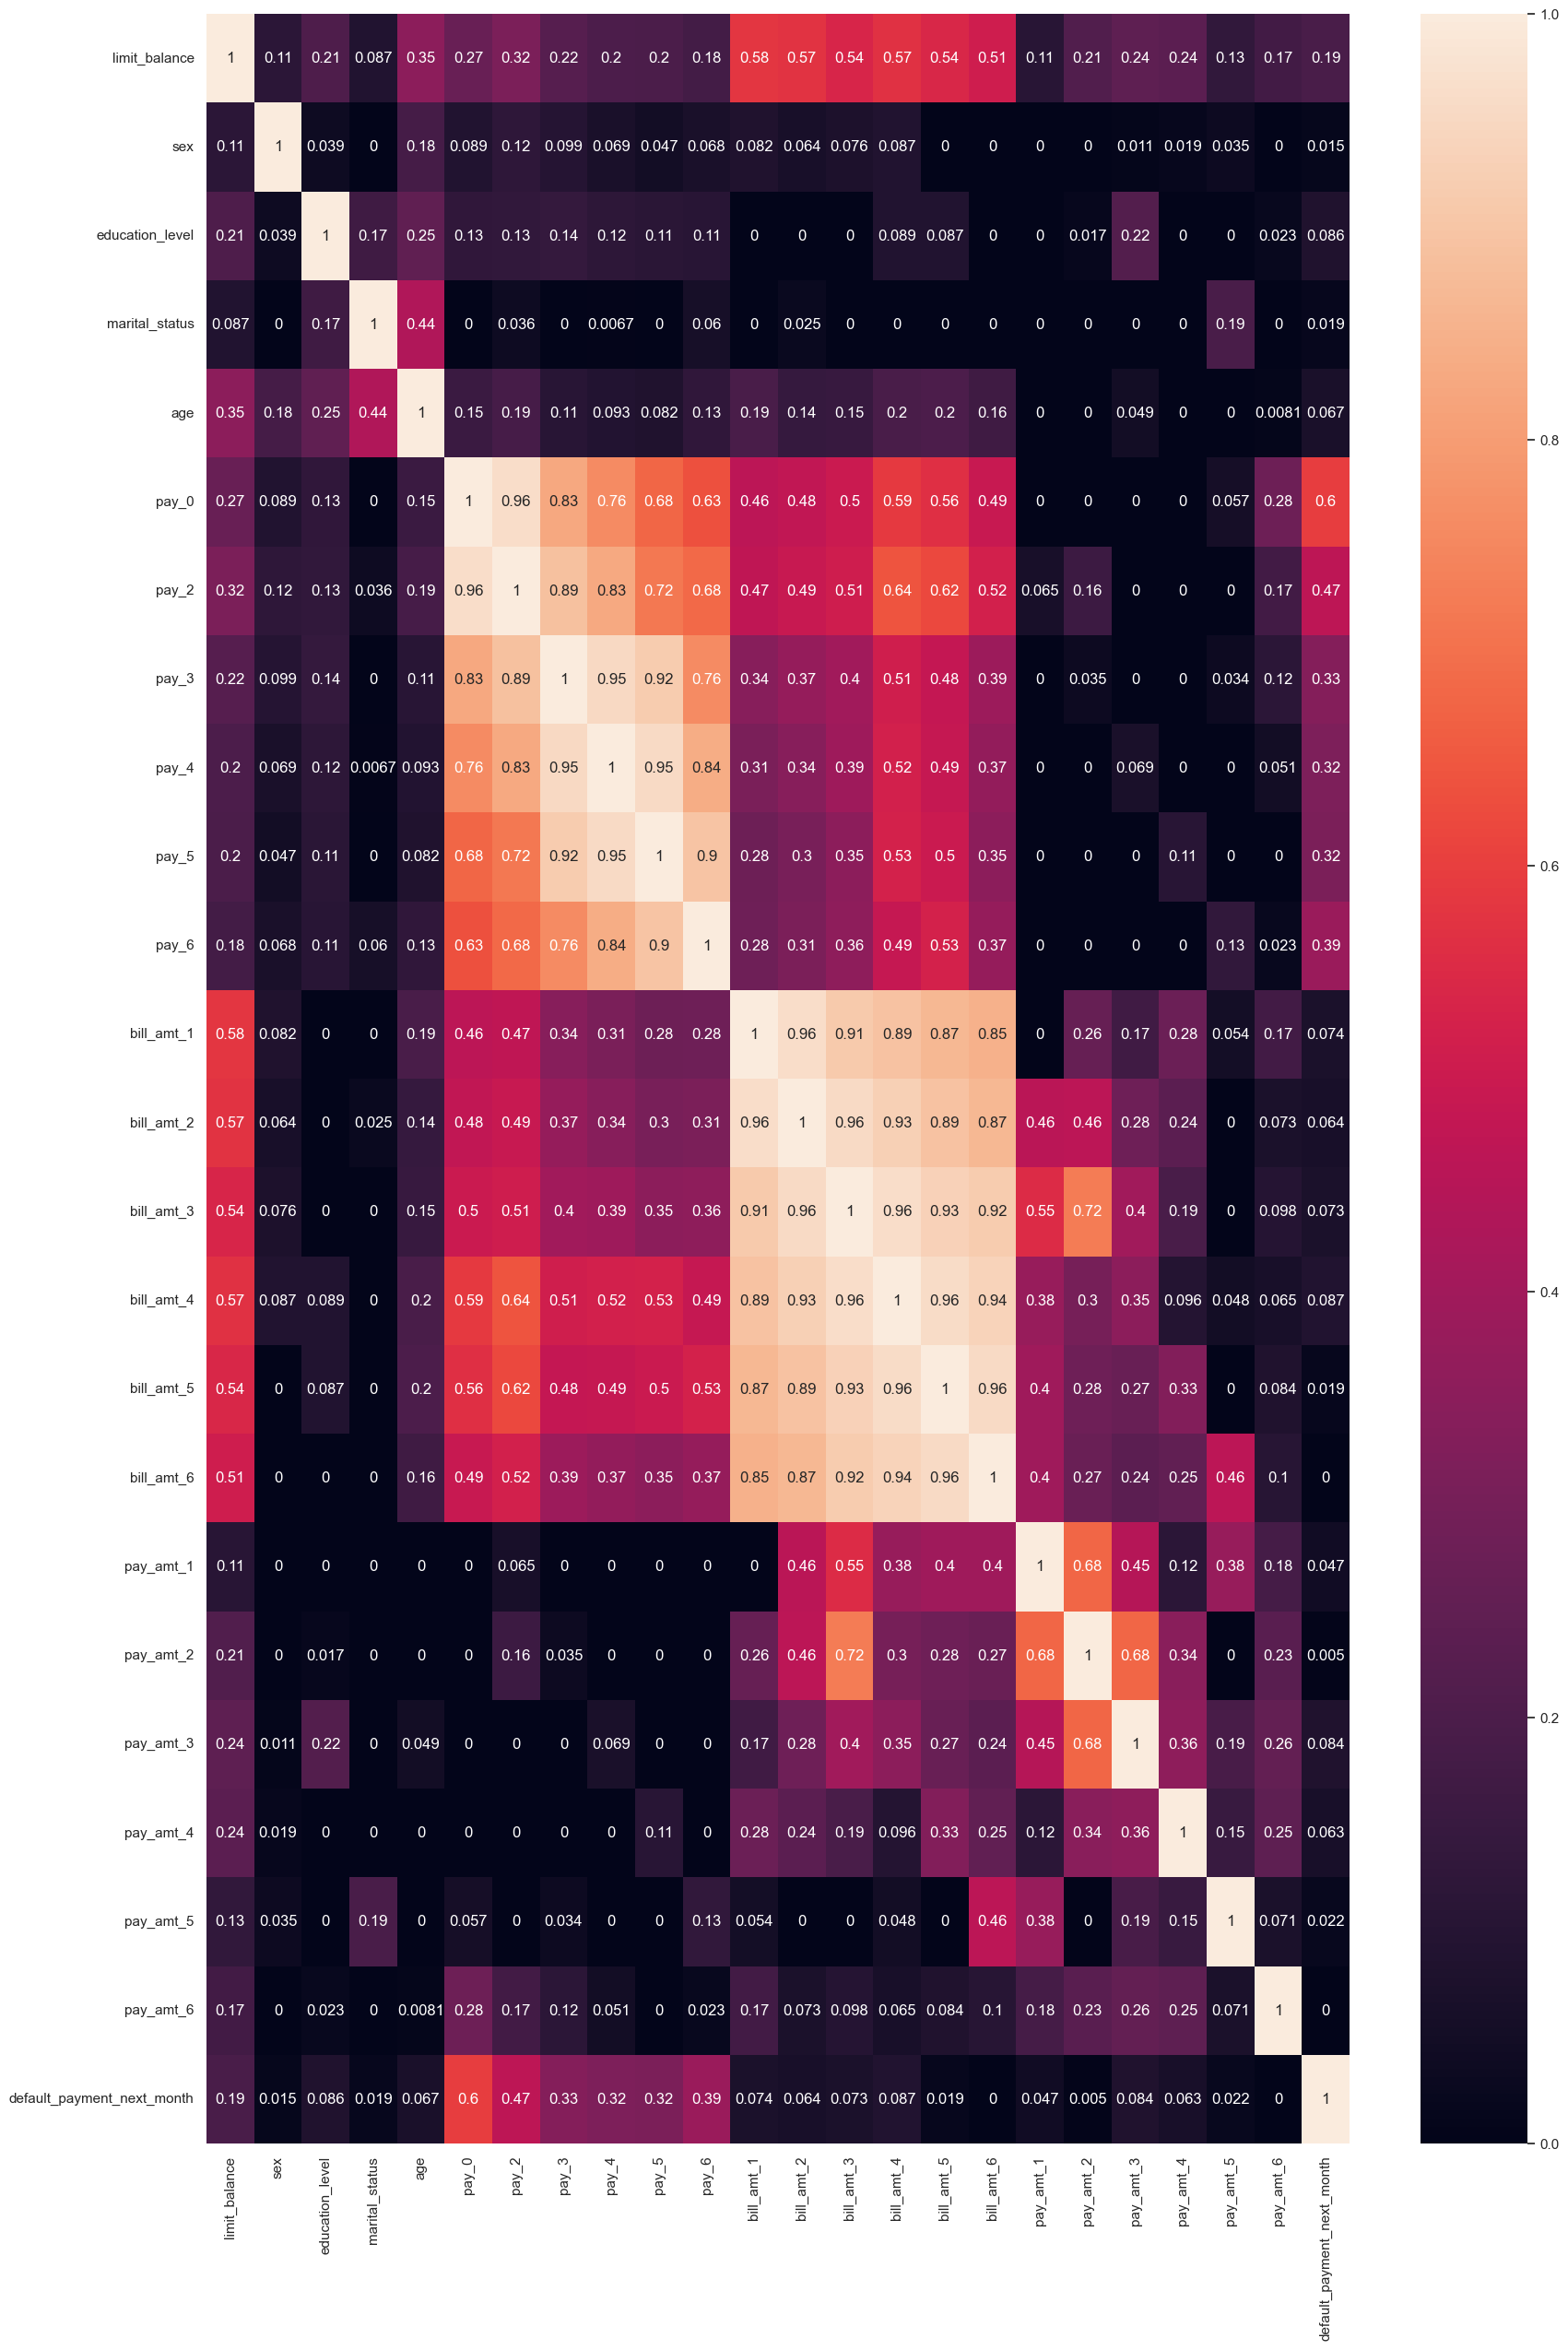

In [52]:
# periksa korelasi dengan phik dan tunjukkan dengan head map

num_data = df_1.select_dtypes(exclude=object)
corr = num_data.phik_matrix()
plt.figure(figsize=(20,30))
sns.heatmap(corr, annot=True)
plt.show()

Dari hasil diatas dapat kita simpulkan bahwa dikarenakan hasil nilainya pada kecil dan kurang dari 0.5 maka kita cari nilai yang diatas 0.1, dan hasil corelasi di atas maka kita akan menggunakan kolom `limit_balance`, `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6`.

Setelah kita dapatkan korelasinya,langkah selanjutnya yaitu memisahkan kolom mana saja yang kita butuhkan dan berpengaruh kepada pembayaran default.

In [53]:
columns = ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Gunakan .loc untuk memilih kolom yang diinginkan
X_train_capped = X_train_capped.loc[:, columns]
X_train_capped.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
48,310000.0,0.0,0.0,0.0,0.0,0.0,0.0
2168,140000.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0
1767,140000.0,0.0,0.0,0.0,2.0,2.0,2.0
2382,210000.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
2563,290000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


kita drop kolom yang tidak berpengaruh pada pembayaran default di X-train.

In [54]:
columns = ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Gunakan .loc untuk memilih kolom yang diinginkan
X_test_capped = X_test_capped.loc[:, columns]
X_test_capped.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
2423,360000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2555,260000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1442,120000.0,1.0,2.0,2.0,2.0,0.0,0.0
1873,140000.0,2.0,2.0,2.0,2.0,2.0,2.0
1561,500000.0,-1.0,2.0,-1.0,0.0,0.0,-1.0


kita drop kolom yang tidak berpengaruh pada pembayaran default di X-test.

### 7. Split kolom numerical dan kolom categorical

Kita pisahkan kolom bagian numerik dan categorical di X-train.

In [55]:
# Inisialisasi list untuk kolom numerik dan kategorikal
num_col = []
cat_col = []

# Loop melalui semua kolom dalam DataFrame
for kolom in X_train_capped.columns:
    if X_train_capped[kolom].min() >= -10 and X_train_capped[kolom].max() <= 10:
        cat_col.append(kolom)
    else:
        num_col.append(kolom)

# Menampilkan daftar kolom numerik
print('Numerical columns:',num_col)

# Menampilkan daftar kolom kategorikal
print('Categorical columns:',cat_col)

Numerical columns: ['limit_balance']
Categorical columns: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


Lalu kita split train set dan test set nya berdasarkan tipe kolom

In [56]:
# Split train set and tet set berdasarkan tipe kolom
X_train_num = X_train_capped[num_col]
X_test_num = X_test_capped[num_col]

X_train_cat = X_train_capped[cat_col]
X_test_cat = X_test_capped[cat_col]

X_train_num.head()

,limit_balance
48,310000.0
2168,140000.0
1767,140000.0
2382,210000.0
2563,290000.0


Dari hasil diatas dapat kita simpulkan bahwa kita akan menggunakan kolom untuk memprediksi  adalah 7 kolom, yaitu :
- 'limit_balance' 
- 'pay_0'
- 'pay_2'
- 'pay_3'
- 'pay_4'
- 'pay_5'
- 'pay_6'

### 8. Cek Cardinality

Langkah selanjutnya adalah kita cek cardinality.

In [57]:
# Cek Cardinality
pd.set_option('display.max_colwidth', None)
values = []
for col in X_train_capped.columns:
    values.append([col, X_train_capped[col].nunique(), X_train_capped[col].unique()])

pd.DataFrame(values, columns=['nama_kolom', 'jumlah_unique', 'nilai_unique'])

,nama_kolom,jumlah_unique,nilai_unique
0,limit_balance,57,"[310000.0, 140000.0, 210000.0, 290000.0, 120000.0, 100000.0, 50000.0, 20000.0, 80000.0, 60000.0, 220000.0, 390000.0, 270000.0, 110000.0, 490000.0, 300000.0, 90000.0, 200000.0, 70000.0, 30000.0, 150000.0, 320000.0, 500000.0, 170000.0, 130000.0, 260000.0, 160000.0, 350000.0, 180000.0, 230000.0, 280000.0, 190000.0, 530000.0, 360000.0, 450000.0, 240000.0, 40000.0, 440000.0, 400000.0, 770000.0, 340000.0, 470000.0, 380000.0, 10000.0, 560000.0, 250000.0, 420000.0, 460000.0, 410000.0, 370000.0, 430000.0, 330000.0, 620000.0, 510000.0, 480000.0, 700000.0, 680000.0]"
1,pay_0,11,"[0.0, -1.0, -2.0, 1.0, 2.0, 7.0, 3.0, 4.0, 5.0, 6.0, 8.0]"
2,pay_2,10,"[0.0, -1.0, -2.0, 2.0, 3.0, 6.0, 1.0, 4.0, 5.0, 7.0]"
3,pay_3,9,"[0.0, -1.0, -2.0, 2.0, 5.0, 3.0, 4.0, 7.0, 6.0]"
4,pay_4,9,"[0.0, 2.0, -1.0, -2.0, 4.0, 3.0, 7.0, 5.0, 8.0]"
5,pay_5,8,"[0.0, -1.0, 2.0, -2.0, 3.0, 4.0, 7.0, 5.0]"
6,pay_6,8,"[0.0, -1.0, 2.0, -2.0, 3.0, 7.0, 6.0, 4.0]"


Dari hasil diatas dapat kita simpulkan bahwa data merupakan data low cardinality karena dia memiliki sedikit categorical dan tidak sampai puluhan, jadi kita tidak perlu melakukan cardinality.

### 9. Feature Scaling

Pada bagian ini kita akan melakukan feature scalling untuk membuat numerical data pada dataset memiliki rentang nilai(scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [58]:
# Display
X_train_cat.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
48,0.0,0.0,0.0,0.0,0.0,0.0
2168,0.0,-1.0,-1.0,0.0,-1.0,-1.0
1767,0.0,0.0,0.0,2.0,2.0,2.0
2382,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
2563,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [59]:
# scalling
scaler = MinMaxScaler()
scaler.fit(X_train_num)     # .fit hanya ada di train, tidak boleh ada di test karena akan ada kebocoran data/data leak !!

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled

array([[0.46052632],
       [0.32894737],
       [0.14473684],
       [0.17105263],
       [0.64473684],
       [0.46052632],
       [0.18421053],
       [0.05263158],
       [0.23684211],
       [0.25      ],
       [0.05263158],
       [0.01315789],
       [0.64473684],
       [0.30263158],
       [0.07894737],
       [0.05263158],
       [0.05263158],
       [0.32894737],
       [0.05263158],
       [0.01315789],
       [0.26315789],
       [0.52631579],
       [0.05263158],
       [0.02631579],
       [0.28947368],
       [0.01315789],
       [0.05263158],
       [0.13157895],
       [0.38157895],
       [0.97368421],
       [0.05263158],
       [0.22368421],
       [0.02631579],
       [0.32894737],
       [0.07894737],
       [0.18421053],
       [0.10526316],
       [0.07894737],
       [0.15789474],
       [0.01315789],
       [0.05263158],
       [0.25      ],
       [0.46052632],
       [0.18421053],
       [0.06578947],
       [0.07894737],
       [0.18421053],
       [0.052

Setelah dilakukan analisis distribusi pada kolom numerik hasilnya adalah distribusi skew, maka kita akan menggunakan metode MinMaxScaler karena :

- MinMaxScaler menskalakan data ke rentang tetap, biasanya antara 0 dan 1.

- Meskipun (0, 1) adalah rentang default, kita juga dapat menentukan rentang nilai maks dan min.

- MinMaxScaler akan mempertahankan bentuk kumpulan data (tidak ada distorsi).

- Kapan menggunakan :

    ➔ Ketika kita mengetahui sebaran datanya bukan Gaussian.
    
    ➔ Berguna ketika algoritma tidak membuat asumsi tentang distribusi.

### 10. Feature Encoding

Pada bagian feature encoding ini kita tidak akan melakukan encoding dikarenakan pada data categorical seluruhnya sudah termasuk ordinal/data sudah diencoding.

### 11. Concate between numerical and categorical columns

Pada bagian ini, kita akan melakukan penggabungan antara dua jenis data yang berbeda: data numerik yang telah diubah skala dan data kategori yang telah di-encode. Alasannya adalah untuk menyatukan semua fitur (features) menjadi satu dataset yang siap digunakan dalam model.

In [60]:
# Gabungkan data numerik berskala dan data kategorikal yang dikodekan
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final = pd.DataFrame(X_train_final, columns=num_col + cat_col)
X_test_final = pd.DataFrame(X_test_final, columns=num_col + cat_col)

X_train_final

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.394737,0.0,0.0,0.0,0.0,0.0,0.0
1,0.171053,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2,0.171053,0.0,0.0,0.0,2.0,2.0,2.0
3,0.263158,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
4,0.368421,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...
2366,0.013158,8.0,7.0,6.0,5.0,4.0,3.0
2367,0.052632,0.0,0.0,0.0,0.0,0.0,0.0
2368,0.092105,0.0,0.0,2.0,0.0,0.0,0.0
2369,0.184211,0.0,0.0,0.0,0.0,0.0,0.0


Jadi dari hasil diatas yaitu untuk menggabungkan data numerik yang telah diubah skala (scaled numeric data) dan data kategori yang telah di-encode (encoded categorical data) menjadi satu dataframe (X_train_final dan X_test_final) termasuk langkah yang penting dalam mempersiapkan data sebelum melatih dan menguji model-machine learning.

---

# vii. Model Definition

Pada bagian ini kita akan membuat cell untuk mendefinisikan model.

In [61]:
# Model define
log_model = LogisticRegression(max_iter=1000000)
svm_model = SVC()
knn_model = KNeighborsClassifier()

---

# viii. Model Training

Pelatihan model (*model training*) ini hanya berisi code untuk melatih model dan output yang dihasilkan. Pelatihan model ini adalah langkah kunci dalam membangun model-machine learning yang efektif, karena model tersebut belajar dari data pelatihan untuk membuat prediksi yang sesuai.

### A. Cross Validation

`StratifiedKFold` digunakan untuk membagi dataset menjadi lipatan (folds) yang disusun dengan mempertahankan proporsi relatif dari kelas target (y) dalam setiap lipatan. Ini adalah bentuk validasi silang yang berguna dalam kasus ketika dataset Anda memiliki kelas yang tidak seimbang.

In [62]:
# Define SKfold
skfold = StratifiedKFold(n_splits=5)

In [63]:
# Tentukan Cross Validation untuk semua model
cv_log_model = cross_val_score(log_model, X_train_final, y_train, cv = skfold, scoring = 'f1')
cv_svm_model = cross_val_score(svm_model, X_train_final, y_train, cv = skfold, scoring = 'f1')
cv_knn_model = cross_val_score(knn_model, X_train_final, y_train, cv = skfold, scoring = 'f1')

In [64]:
# Menemukan Model Terbaik berdasarkan Cross_Val_Score (rata-rata)
name_model = []
cv_scores = 0
for cv,name in zip([cv_log_model, cv_svm_model, cv_knn_model], # untuk yang cv
                   ['log_model', 'svm_model', 'knn_model']):
    print(name)
    print('f1score - All - Cross Validation :', cv)
    print('f1score - Mean - Cross Validation :', cv.mean())
    print('f1score - std - Cross Validation :', cv.std())
    print('f1score - Range of Test Set - Cross Validation :', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

log_model
f1score - All - Cross Validation : [0.39705882 0.34108527 0.45070423 0.40277778 0.4137931 ]
f1score - Mean - Cross Validation : 0.4010838402850815
f1score - std - Cross Validation : 0.03533442074403503
f1score - Range of Test Set - Cross Validation : 0.36574941954104645 - 0.4364182610291165
--------------------------------------------------
svm_model
f1score - All - Cross Validation : [0.55421687 0.50331126 0.51764706 0.52439024 0.46540881]
f1score - Mean - Cross Validation : 0.5129948467010881
f1score - std - Cross Validation : 0.029013639543501692
f1score - Range of Test Set - Cross Validation : 0.4839812071575864 - 0.5420084862445897
--------------------------------------------------
knn_model
f1score - All - Cross Validation : [0.48044693 0.43478261 0.52571429 0.47953216 0.37037037]
f1score - Mean - Cross Validation : 0.45816927117945994
f1score - std - Cross Validation : 0.05247967053655996
f1score - Range of Test Set - Cross Validation : 0.4056896006429 - 0.510648941716

Dari hasil diatas dapat disimpulkan bahwa model yang terbaik yang dapat digunakan adalah svm_model.

### B. Model Dasar

In [65]:
# Model Baseline menggunakan Algoritma Random Forest

svm_model.fit(X_train_final, y_train)

SVC()

F1 Score - Train Set  :  0.5558252427184466 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1863
           1       0.72      0.45      0.56       508

    accuracy                           0.85      2371
   macro avg       0.79      0.70      0.73      2371
weighted avg       0.83      0.85      0.83      2371
 

Confusion Matrix      : 


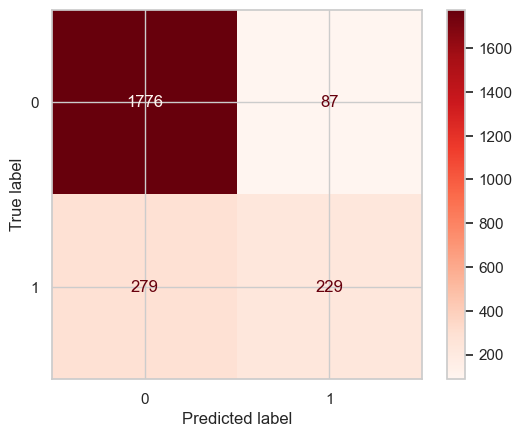

In [66]:
# Periksa Performance Model terhadap Train-Set
y_pred_train = svm_model.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_model.fit(X_train_final, y_train)
, X_train_final, y_train, cmap='Reds'))

Hasil F1 Score - Train Set adalah 0.5558252427184466. Model hanya mampu mengidentifikasi 55.58% dari semua kasus kelas 1 di dalam data pelatihan.

menggunakan F1 score dikarenakan kita ingin membantu perusahaan agar tidak kehilangan klien yang tidak membayar.

### C. Hyper Parameter Tuning

Hyperparameter dari model knn dilakukan dengan random search dengan tujuan saat proses dilakukan tidak membutuhkan waktu yang terlalu lama.

Dilakukan untuk mencari kombinasi parameter terbaik untuk suatu model.

In [67]:
# Tentukan Hyperparameters
C = [0.1, 1, 10, 100]
kernel = ['rbf', 'poly']
gamma = [1, 0.1]
random_search_params = {'C': C,
                        'kernel':kernel,
                        'gamma':gamma}
random_search_params

{'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly'], 'gamma': [1, 0.1]}

Didapatkan kombinasi terbaik.

In [68]:
# Train dengan Random Search

svm_random = RandomizedSearchCV(estimator=svm_model,
                                 param_distributions=random_search_params,
                                 n_iter=3,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
svm_random.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=3, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1],
                                        'kernel': ['rbf', 'poly']},
                   random_state=46, scoring='f1')

Cek parameter terbaik

In [69]:
# Dapatkan Hyperparameter Terbaik
svm_random.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

Masukan parameter terbaik ke model

In [70]:
# Dapatkan Estimator Terbaik
svm_random_best = svm_random.best_estimator_

---

# ix. Model Evaluation

Pada bagian ini kita akan mengukur sejauh mana model statistik atau model pembelajaran mesin bekerja dengan baik dalam memprediksi atau memodelkan data. Hal yang pertama kita lakukan adalah buat prediksinya terlebih dahulu.

F1 Score - Test Set   :  0.5700934579439253 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       466
           1       0.70      0.48      0.57       127

    accuracy                           0.84       593
   macro avg       0.79      0.71      0.74       593
weighted avg       0.83      0.84      0.83       593
 

Confusion Matrix      : 


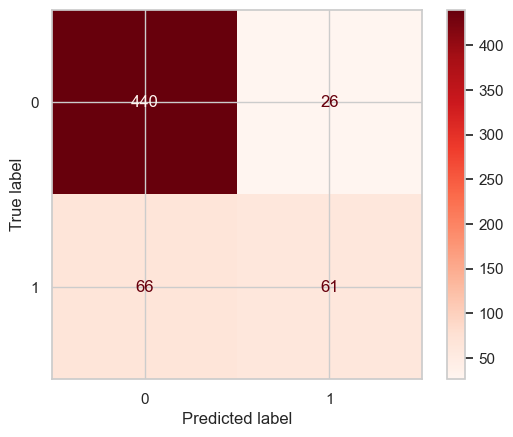

In [71]:
# Periksa Performance Model terhadap Test-Set
y_pred_test = svm_random_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_random_best, X_test_final, y_test, cmap='Reds'))

F1 Score - train Set   :  0.547008547008547 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1863
           1       0.72      0.44      0.55       508

    accuracy                           0.84      2371
   macro avg       0.79      0.70      0.73      2371
weighted avg       0.83      0.84      0.83      2371
 



Confusion Matrix      : 


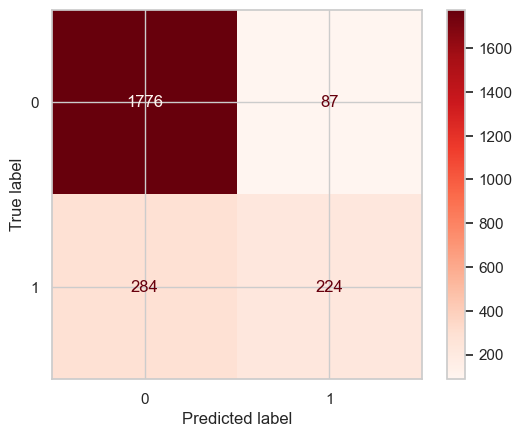

In [72]:
# Periksa Performance Model terhadap train-Set
y_pred_train = svm_random_best.predict(X_train_final)

print('F1 Score - train Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_random_best, X_train_final, y_train, cmap='Reds'))

Dilihat dari hasil perbandingan f1 score test dan train (keterangan hasil diatas,tidak dituliskan karena hasilnya mudah berubah-ubah) dapat kita simpulkan bahwa mesin learning termasuk ke dalam underfit.

In [73]:
perbandingan = pd.DataFrame({'aktual': y_test,
                             'prediksi': y_pred_test})

perbandingan

,aktual,prediksi
2423,0,0
2555,0,0
1442,0,1
1873,1,1
1561,0,0
...,...,...
471,0,0
173,0,0
966,0,0
2556,0,0


---

# x. Model Saving

Penyimpanan model (*model saving*) dan informasi terkait adalah langkah penting dalam pengembangan model-machine learning. Dengan cara ini, Anda dapat dengan mudah menggunakan model yang telah dilatih di masa depan, berbagi model dengan orang lain, atau memuat kembali model untuk prediksi.

In [74]:
# Menyimpan file
with open('svm_random_best.pkl', 'wb') as file_1: #wb = write binnary
    pickle.dump(svm_random_best,file_1)

with open('scaler.pkl','wb') as file_2:
    pickle.dump(scaler, file_2)

with open('capped.txt','w') as file_3:
    json.dump(num_col, file_3)

with open('cat_col.txt', 'w') as file_4:
    json.dump(cat_col, file_4)

Dalam code diatas kita menggunakan library `pickle` untuk menyimpan model dan scaler, serta menggunakan `JSON` untuk menyimpan informasi tentang fitur numerik dan kategori. Dengan demikian, kita bisa memuat kembali model dan konfigurasi preprocessing dengan mudah untuk penggunaan berikutnya.

---

# xi. Model Inference

Pada Model inference ini dibuat di notebook yang berbeda dengan format nama `P1G5_Set_1_jeni_kasturi_inf.ipynb`

---

# xii. Kesimpulan

**Penjelasan Data**

Dari pengolahan data diatas dapat kita simpulkan bahwa data berisikan :
- Terdapat 24 kolom
- Bertipe Float(64) 20 kolom dan Integer(64) 4 kolom
- Memiliki 2965 baris
- Dan tidak terdapat missing value, jadi tidak perlu kita handle missing valuenya.

Tujuan dari projek ini yaitu untuk mengetahui faktor-faktor apa saja yang mempengaruhi pelanggan dalam menggunakan pinjaman pada kartu kredit apakah klien akan membayar tepat waktu atau tidak, serta mendapatkan hasil prediksi dengan menggunakan *Logistic Regression*, *Support Vector Machine* (`SVM`), dan *K-Nearest Neighbors* (`KNN`) untuk memprediksi default_payment_next_month sesuai dengan yang diharapkan dengan hasil Goodfit pada akhir test.

**Hasil Eksplorasi Data**

Dari hasil analisa yang sudah kita lakukan pada dataset, kita dapat menemukan fakta bahwa :
1. Pada ***Data Loading*** : datanya termasuk skew distribution karena hasil mean dan median(50%) dari kolom `limit_balance` itu jauh angkanya.

2. Pada ***Exploratory Data Analysis (EDA)*** : pelanggan dengan usia 30 adalah yang terbanyak, sedangkan pelanggan dengan usia diatas 55 tidak terlalu banyak dan rata-rata pelanggannya kurang dari 20.

3. Pada ***Feature Engineering*** : 
    - Karena tidak terdapat missing value pada setiap kolomnya, maka kita tidak perlu melakukan handling missing value.

    - Menghandle outliers dengan menggunakan metode *caping* pada kolom `limit_balance`,`age`,`bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, dan `pay_amt_6`. 

    - Melakukan korelasi dengan `phik` dan tunjukkan dengan head map *hitmap* untuk mencari korelasi antara (X) dan (y).

    - Menggunakan 7 kolom untuk memprediksi `default_payment_next_month`, yaitu `limit_balance`, `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, dan `pay_6`.

    - Setelah dilakukan analisis distribusi pada kolom numerik hasilnya adalah distribusi skew, maka kita akan menggunakan metode *MinMaxScaler*
    
    - Pada bagian feature encoding, kita tidak akan melakukan encoding dikarenakan pada data categorical seluruhnya sudah termasuk ordinal/data sudah diencoding.

    - Menggabungkan data numerik yang telah diubah skala (scaled numeric data) dan data kategori yang telah di-encode (encoded categorical data) menjadi satu dataframe (X_train_final dan X_test_final)

4. Pada ***Model Definition*** : Membuat cell untuk mendefinisikan model dengan menggunakan LogisticRegression, SVC, dan KNeighborsClassifier.

5. Pada ***Model Evaluation*** : 
    - Memprediksi mesin dalam mengukur model statistik atau model pembelajaran mesin bekerja dengan baik dalam memprediksi atau memodelkan data.
    
    - Mengukur rata-rata dari selisih absolut antara prediksi model dan nilai sebenarnya dengan menggunakan perbandingan f1 score dikarenakan mesin learning termasuk ke dalam underfit.
    
    - Menampilkan perbandingan dari `y_test` (aktual) dan `y_pred_test` (prediksi).

6. Pada ***Model Saving*** :
    - Menggunakan library `pickle` untuk menyimpan model, scaler, dan encoder dalam bentuk file biner.
    
    - Menggunakan `JSON` untuk menyimpan informasi tentang fitur numerik dan kategori

7. Pada ***Model Inference*** : Kita menampilkan model yang sudah dilatih dan akan dicoba tampilkan sebagian data pada data yang bukan termasuk ke dalam train-set ataupun test-set, yang merupakan format data yang asli dan bukan data yang sudah di-scaled pada halaman baru. Dan hasil yang ditampilkan adalah goodfit.

**Rekomendasi**

Rekomendasi yang dapat saya berikan kepada anda yang ingin menganalisis project ini yaitu dengan mencoba metode lain dari yang saya lakukan, menggunakan proses pengnanganan outlier yang lain (seperti triming,dll),mencoba metode lain dari yang saya gunakan (seperti SVM,F1 score,dll) dan coba gunakan kolom lain yang kemungkinan berpengaruh/memiliki korelasi dengan harga dari 7 sampel kolom yang saya gunakan.

---

# Pertanyaan

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

    *Jawab* :

    Koefisien ini diperoleh melalui proses pelatihan model regresi logistik dengan menggunakan data yang memiliki label kategori yang sudah diketahui (Y=1 atau Y=0) dan variabel independen (X1, X2, ..., Xn). Tujuannya adalah untuk menentukan koefisien yang paling sesuai dengan data untuk memprediksi probabilitas kejadian peristiwa Y=1 berdasarkan nilai-nilai variabel independen. Koefisien ini digunakan  untuk memperkirakan probabilitas sukses atau kegagalan peristiwa yang sedang dipelajari.

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

    *Jawab* :

    Parameter kernel dalam Support Vector Machine (SVM) adalah salah satu parameter kunci yang menentukan cara pemisahan data kelas dilakukan dalam ruang fitur yang lebih tinggi. Fungsi utama parameter kernel adalah untuk mentransformasi data input ke dalam ruang dimensi yang lebih tinggi. Ini memungkinkan SVM untuk menangani data yang tidak dapat dipisahkan secara linear dalam ruang dimensi asli.

    Beberapa jenis kernel yang umum digunakan dalam SVM yaitu :
    
    - Kernel Linier: Ini digunakan untuk pemisahan data yang dapat dipisahkan dengan baik secara linier.

    - Kernel RBF (Radial Basis Function): Digunakan untuk menangani data yang sangat kompleks dan tidak memiliki pola tertentu.

3. Bagaimana cara memilih `K` yang optimal pada KNN ?

    *Jawab* :

    Untuk memilih nilai K yang optimal dalam algoritma K-Nearest Neighbors (KNN), Anda dapat menggunakan validasi silang (cross-validation) dengan melatih dan menguji model KNN pada berbagai nilai K. Kemudian, pilih nilai K yang memberikan kinerja terbaik sesuai dengan metrik evaluasi, seperti akurasi, presisi, atau F1-score.

4. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

    *Jawab* :

    - *`Accuracy`*: Mengukur sejauh mana model klasifikasi benar-benar memprediksi label dengan benar. Tepat ketika Anda ingin mengukur keseluruhan kinerja model.

    - *`Precision`*: Mengukur berapa persentase positif yang diprediksi dengan benar dari yang sebenarnya positif. Berguna ketika ingin meminimalkan kesalahan positif palsu.

    - *`Recall`*: Mengukur berapa persentase positif yang berhasil diidentifikasi oleh model. Berguna ketika ingin meminimalkan kesalahan negatif palsu.

    - *`F1 Score`*: Menggabungkan presisi dan recall ke dalam satu metrik, cocok digunakan ketika ingin mencapai keseimbangan antara kedua metrik tersebut.

    Waktu yang tepat untuk menggunakannya bergantung pada tujuan dan kebutuhan spesifik kita. Misalnya, jika kita ingin menghindari kesalahan prediksi positif palsu yang dapat mahal atau berbahaya, kita akan lebih fokus pada presisi. Jika kita ingin meminimalkan kesalahan prediksi negatif palsu yang dapat berdampak serius, kita akan lebih memperhatikan recall. F1 Score berguna saat kita ingin mencapai keseimbangan antara kedua aspek tersebut. Accuracy adalah metrik yang relevan untuk mengukur kinerja keseluruhan model.